

<div style="text-align: center;">
    <img src="https://c8.alamy.com/comp/HAMBWE/business-graph-icon-isolated-on-glossy-blue-round-button-abstract-HAMBWE.jpg" alt="Graph Icon" style="width: 200px;">
</div>


<div style ="background-color: lightblue; padding: 30px; text-align: center; font-size: 30px;">
      <strong>Inflation Effects</strong>
</div>


# <span style="color: #FF5733;">Data Analysis Project: The Impact of Inflation on GDP and Unemployment Rates</span>

## <span style="color: #28A745;">1. Project Overview</span>
This project aims to analyze the relationship between inflation, GDP, and unemployment rates over time. By examining historical data from **1960 to 2024** across various countries, we seek to understand how changes in inflation rates influence economic growth and employment levels.

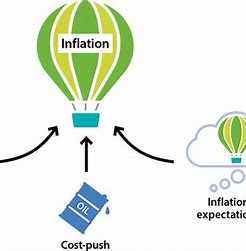

## <span style="color: #28A745;">2. Data Sources</span>
The analysis is based on three primary datasets:

### <span style="color: #007BFF;">2.1 Inflation Dataset</span>
**Description:** This dataset contains annual inflation rates for all countries worldwide from **1960 to 2024**. It provides a detailed account of how prices have changed over time.  
**Columns:**
- **Country Name**
- **Continent**
- **Country Code**
- **Indicator Name**
- **Yearly inflation rates from 1960 to 2024**
- **Average Inflation**
- **Inflation Level**

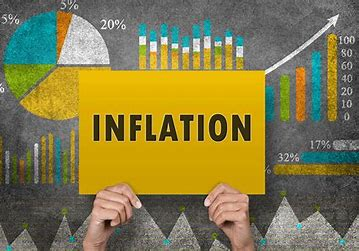

### <span style="color: #007BFF;">2.2 GDP Dataset</span>
**Description:** The GDP dataset includes information on annual GDP growth rates and GDP levels for each country from **1960 to 2024**.  
**Columns:**
- **Country Name**
- **Continent**
- **Indicator Name**
- **Yearly GDP data from 1960 to 2024**
- **Average GDP Growth**
- **Average GDP Level**

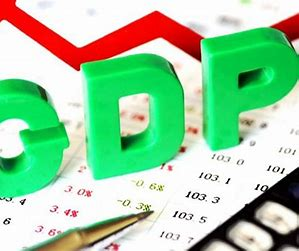

### <span style="color: #007BFF;">2.3 Unemployment Dataset</span>
**Description:** This dataset contains unemployment rates categorized by sex and age for all countries from **1960 to 2024**. It helps analyze employment trends relative to inflation.  
**Columns:**
- **Country Name**
- **Continent**
- **Sex**
- **Age Categories**
- **Year**
- **Unemployment Rate**

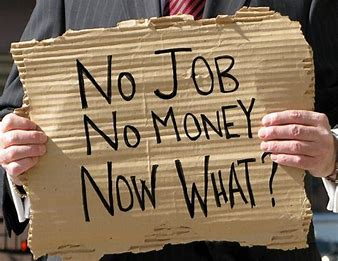

### <span style="color: #007BFF;">2.4 Additional Data Sources</span>
- **Financial Data:** Historical exchange rates between the Egyptian pound and the US dollar, scraped from financial websites.  
- **Trade Data:** Imports and exports of Egypt, providing insights into the country's economic interactions over time. This data is sourced from the World Bank and relevant financial reports.

## <span style="color: #28A745;">3. Methodology</span>

### <span style="color: #007BFF;">3.1 Data Cleaning and Preprocessing</span>
- Cleaned and organized datasets to ensure consistency and compatibility for analysis.
- Merged datasets based on common keys (e.g., country name and year) to facilitate comparative analysis.

### <span style="color: #007BFF;">3.2 Data Analysis</span>
- The analysis passes through three processes:
  1. **Global Analysis:** Analyzed trends in inflation, GDP growth, and unemployment rates from **1960 to 2024** across all countries.
  2. **Africa Analysis:** Focused on the African continent, examining regional trends and how they compare to global patterns.
  3. **Egypt Analysis:** Conducted a detailed examination of Egypt's economic indicators in relation to inflation, GDP, and unemployment.

- Used statistical methods to determine the correlation between inflation rates and economic indicators (GDP and unemployment).
- Created visualizations (graphs and plots) to illustrate findings and trends.

### <span style="color: #007BFF;">3.3 Additional Analysis</span>
- Scraped additional data from Wikipedia regarding economic indicators in Africa to contextualize findings within the regional economic landscape.
- Analyzed the impact of external factors (like currency exchange rates and trade volumes) on inflation and economic stability in Egypt.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import mysql.connector
from IPython.display import display, Markdown
from sklearn.impute import SimpleImputer
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
!pip install ipython_sql
%load_ext sql
import warnings
!pip install geopandas matplotlib
!pip install yfinance 
!pip install pandas-datareader
import yfinance as yf
warnings.filterwarnings('ignore')
import requests
import pandas_datareader.wb as wb
from bs4 import BeautifulSoup

In [60]:
display(Markdown('## **Importing our Data from the Database** ##'))

## **Importing our Data from the Database** ##

In [3]:
# connectio to the data base:
conn = mysql.connector.connect(user='ahmed',password='admin', host='localhost',database='final_project')
cursor = conn.cursor()

#select the first table inflation and make it in a form of data frame:
cursor.execute('select * from inflation')
inflation_cursor = cursor.fetchall()
column_inf = [i[0] for i in cursor.description]
inflation = pd.DataFrame(inflation_cursor, columns = column_inf)

#select the second table gdp and make it in a form of data frame:
cursor.execute('select * from gdp')
gdp_cursor = cursor.fetchall()
column_gdp = [i[0] for i in cursor.description]
gdp = pd.DataFrame(gdp_cursor, columns = column_gdp)

#select the third table unemployment form the data base and make it in a form of data frame:
cursor.execute('select * from unemployment')
unem_cursor = cursor.fetchall()
column_unem = [i[0] for i in  cursor.description]
unemployment = pd.DataFrame(unem_cursor, columns = column_unem)


### sample of each table(first 5 rows)

In [4]:
#display the first 5 rows in our tables
display(Markdown('## **we have three tables form our database** ##'))
display(Markdown('## **frist (inflation table)** ##'))
print(inflation.head(5))
display(Markdown('## **second (Growth Domestic Product table)** ##'))
print(gdp.head(5))
display(Markdown('## **third (Unemployment Table)** ##'))
print(unemployment.head(5))


## **we have three tables form our database** ##

## **frist (inflation table)** ##

   ï»¿country_name MyUnknownColumn  Country Name  Continent  Country Code  \
0  ï»¿country_name                  Country Name  Continent  Country Code   
1      Afghanistan                   Afghanistan       Asia           AFG   
2          Albania                       Albania     Europe           ALB   
3          Algeria                       Algeria     Africa           DZA   
4          Andorra                       Andorra     Europe           AND   

      Indicator Name MyUnknownColumn_[0]  1980  1981  1982  ...     2015  \
0     Indicator Name                      1980  1981  1982  ...  2015.00   
1         GDP Growth                TRUE  13.4  22.2  18.2  ...    -0.66   
2  Unemployment Rate                TRUE                    ...     1.90   
3     Inflation Rate                TRUE   9.7  14.6   6.6  ...     4.80   
4     GDP per Capita                TRUE                    ...    -1.10   

      2016     2017     2018    2019     2020     2021     2022    2023  2024  


## **second (Growth Domestic Product table)** ##

  country_name                      indicator_name  1980  1981 1982 1983 1984  \
0  Afghanistan  Annual GDP growth (percent change)                              
1      Albania  Annual GDP growth (percent change)   2.7   5.7  2.9  1.1    2   
2      Algeria  Annual GDP growth (percent change)  -5.4     3  6.4  5.4  5.6   
3      Andorra  Annual GDP growth (percent change)                              
4       Angola  Annual GDP growth (percent change)   2.4  -4.4    0  4.2    6   

   1985  1986  1987  ... 2015 2016 2017 2018 2019  2020  2021 2022 2023 2024  
0                    ...  1.0  2.2  2.6  1.2  3.9  -2.4 -20.7                 
1  -1.5   5.6  -0.8  ...  2.2  3.3  3.8  4.0  2.1  -3.3   8.9  4.8  3.6  3.3  
2   5.6  -0.2  -0.7  ...  3.7  3.2  1.4  1.2  1.0  -5.1   3.4  3.2  3.8  3.1  
3                    ...  1.4  3.7  0.3  1.6  2.0 -11.2   8.3  8.8  2.1  1.5  
4   3.5   2.9   4.1  ...  0.9 -2.6 -0.2 -1.3 -0.7  -5.6   1.2    3  1.3  3.3  

[5 rows x 47 columns]


## **third (Unemployment Table)** ##

   country_name                    indicator_name     sex  age_group  \
0  country_name                    indicator_name     sex  age_group   
1   Afghanistan  Unemployment rate by sex and age  Female      15-24   
2   Afghanistan  Unemployment rate by sex and age  Female        25+   
3   Afghanistan  Unemployment rate by sex and age  Female   Under 15   
4   Afghanistan  Unemployment rate by sex and age    Male      15-24   

   age_categories      2014      2015      2016      2017      2018      2019  \
0  age_categories  2014.000  2015.000  2016.000  2017.000  2018.000  2019.000   
1           Youth    13.340    15.974    18.570    21.137    20.649    20.154   
2          Adults     8.576     9.014     9.463     9.920    11.223    12.587   
3        Children    10.306    11.552    12.789    14.017    14.706    15.418   
4           Youth     9.206    11.502    13.772    16.027    15.199    14.361   

       2020      2021      2022      2023      2024  
0  2020.000  2021.000  202

<div style ="background-color: #3E6B89; padding: 15px; text-align: center; font-size: 24px; color: white;">
      <strong>Exploratory Data Analysis</strong>
</div>

<div style='background-color:#CBF9DA; font-size:20px; padding:10px; color:black'>
        <strong>Inflation Table (EDA)</strong>
</div>

In [140]:
#make Exploratory Data Analysis

#inflation table
## make the empety cells NaN to can deal with it
inflation = inflation.replace('',np.NaN)
inflation = inflation.replace(' ',np.NaN)
inflation = inflation.replace('   ',np.NaN)
inflation = inflation.replace('     ',np.NaN)

## Make exploratory Analysis for the table
display(Markdown('## **EDA (inflation table)** ##'))
display(Markdown('# *Inflation Column types* #'))
print(inflation.dtypes)

## make a summary for the inflation Table
display(Markdown('# *Inflation summary* #'))
print(inflation.info())

## make Statistical Description
display(Markdown('# *Inflation Statistical Description* #'))
print(inflation.describe(include ='all'))

## find the number of the missing Values
display(Markdown('# *Inflation missing Values* #'))
in_missing =inflation.isnull().sum()
print(in_missing)

## find Duplicates
display(Markdown('# *Inflation Duplicates Values* #'))
dup = inflation.duplicated().sum()
print(f' the number of duplicates values is ({dup}) ')
print('\n')



C:\Users\HP\AppData\Local\Temp\ipykernel_17600\2077194241.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inflation = inflation.replace('',np.NaN)


## **EDA (inflation table)** ##

# *Inflation Column types* #

ï»¿country_name         object
MyUnknownColumn        float64
Country Name            object
Continent               object
Country Code            object
Indicator Name          object
MyUnknownColumn_[0]     object
1980                    object
1981                    object
1982                    object
1983                    object
1984                    object
1985                    object
1986                    object
1987                    object
1988                    object
1989                    object
1990                    object
1991                    object
1992                    object
1993                    object
1994                    object
1995                    object
1996                    object
1997                    object
1998                    object
1999                    object
2000                    object
2001                    object
2002                   float64
2003                   float64
2004                   float64
2005    

# *Inflation summary* #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ï»¿country_name      185 non-null    object 
 1   MyUnknownColumn      0 non-null      float64
 2   Country Name         185 non-null    object 
 3   Continent            185 non-null    object 
 4   Country Code         185 non-null    object 
 5   Indicator Name       185 non-null    object 
 6   MyUnknownColumn_[0]  184 non-null    object 
 7   1980                 138 non-null    object 
 8   1981                 142 non-null    object 
 9   1982                 143 non-null    object 
 10  1983                 143 non-null    object 
 11  1984                 143 non-null    object 
 12  1985                 143 non-null    object 
 13  1986                 143 non-null    object 
 14  1987                 145 non-null    object 
 15  1988                 145 non-null    obj

# *Inflation Statistical Description* #

        ï»¿country_name  MyUnknownColumn  Country Name Continent  \
count               185              0.0           185       185   
unique              185              NaN           185         8   
top     ï»¿country_name              NaN  Country Name    Africa   
freq                  1              NaN             1        51   
mean                NaN              NaN           NaN       NaN   
std                 NaN              NaN           NaN       NaN   
min                 NaN              NaN           NaN       NaN   
25%                 NaN              NaN           NaN       NaN   
50%                 NaN              NaN           NaN       NaN   
75%                 NaN              NaN           NaN       NaN   
max                 NaN              NaN           NaN       NaN   

        Country Code   Indicator Name MyUnknownColumn_[0]  1980  1981 1982  \
count            185              185                 184   138   142  143   
unique           185       

# *Inflation missing Values* #

ï»¿country_name          0
MyUnknownColumn        185
Country Name             0
Continent                0
Country Code             0
Indicator Name           0
MyUnknownColumn_[0]      1
1980                    47
1981                    43
1982                    42
1983                    42
1984                    42
1985                    42
1986                    42
1987                    40
1988                    40
1989                    40
1990                    37
1991                    32
1992                    29
1993                    19
1994                    17
1995                    16
1996                    12
1997                     9
1998                     8
1999                     7
2000                     6
2001                     2
2002                     0
2003                     0
2004                     0
2005                     0
2006                     0
2007                     0
2008                     0
2009                     0
2

# *Inflation Duplicates Values* #

 the number of duplicates values is (0) 




<div style='background-color:#FFEEAD; font-size:20px; padding:10px; color:black'>
        <strong>Growth Domestic Product Table (EDA)</strong>
</div>

In [141]:
#GDP table
display(Markdown('## **EDA (Growth Domestic Product table)** ##'))

## make the empety cells NaN to can deal with it
gdp = gdp.replace('',np.NaN)
gdp = gdp.replace(' ',np.NaN)
gdp = gdp.replace('   ',np.NaN)
gdp = gdp.replace('     ',np.NaN)


## show the gdp column types
display(Markdown('# *GDP column types* #'))
print(inflation.dtypes)

## show the gdp summary
display(Markdown('# *GDP Summary* #'))
print(inflation.info())

## show the gdp statistical describtion
display(Markdown('# *GDP Statistical Description* #'))
print(inflation.describe(include ='all'))

## find the missing values
display(Markdown('# *GDP Missing Values* #'))
print(gdp.isnull().sum())

## find duplicates
display(Markdown('# *Dublicates* #'))
duplicated_gdp = gdp.duplicated().sum()
print(f'the number of duplicated values ({duplicated_gdp})')
print('\n')


## **EDA (Growth Domestic Product table)** ##

# *GDP column types* #

ï»¿country_name         object
MyUnknownColumn        float64
Country Name            object
Continent               object
Country Code            object
Indicator Name          object
MyUnknownColumn_[0]     object
1980                    object
1981                    object
1982                    object
1983                    object
1984                    object
1985                    object
1986                    object
1987                    object
1988                    object
1989                    object
1990                    object
1991                    object
1992                    object
1993                    object
1994                    object
1995                    object
1996                    object
1997                    object
1998                    object
1999                    object
2000                    object
2001                    object
2002                   float64
2003                   float64
2004                   float64
2005    

# *GDP Summary* #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ï»¿country_name      185 non-null    object 
 1   MyUnknownColumn      0 non-null      float64
 2   Country Name         185 non-null    object 
 3   Continent            185 non-null    object 
 4   Country Code         185 non-null    object 
 5   Indicator Name       185 non-null    object 
 6   MyUnknownColumn_[0]  184 non-null    object 
 7   1980                 138 non-null    object 
 8   1981                 142 non-null    object 
 9   1982                 143 non-null    object 
 10  1983                 143 non-null    object 
 11  1984                 143 non-null    object 
 12  1985                 143 non-null    object 
 13  1986                 143 non-null    object 
 14  1987                 145 non-null    object 
 15  1988                 145 non-null    obj

# *GDP Statistical Description* #

        ï»¿country_name  MyUnknownColumn  Country Name Continent  \
count               185              0.0           185       185   
unique              185              NaN           185         8   
top     ï»¿country_name              NaN  Country Name    Africa   
freq                  1              NaN             1        51   
mean                NaN              NaN           NaN       NaN   
std                 NaN              NaN           NaN       NaN   
min                 NaN              NaN           NaN       NaN   
25%                 NaN              NaN           NaN       NaN   
50%                 NaN              NaN           NaN       NaN   
75%                 NaN              NaN           NaN       NaN   
max                 NaN              NaN           NaN       NaN   

        Country Code   Indicator Name MyUnknownColumn_[0]  1980  1981 1982  \
count            185              185                 184   138   142  143   
unique           185       

# *GDP Missing Values* #

country_name       0
indicator_name     0
1980              51
1981              47
1982              45
1983              45
1984              45
1985              45
1986              44
1987              43
1988              42
1989              42
1990              42
1991              34
1992              32
1993              22
1994              20
1995              18
1996              15
1997              15
1998              12
1999               9
2000               9
2001               2
2002               1
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               1
2023               3
2024               3
dtype: int64


# *Dublicates* #

the number of duplicated values (0)




<div style='background-color:#C6FFC1; font-size:20px; padding:10px; color:black'>
        <strong>Unemployment Table (EDA)</strong>
</div>

In [142]:
# Unemployment table
display(Markdown('## **EDA (Unemployment Table)** ##'))

# Make empty cells NaN to deal with them
unemployment = unemployment.replace('', np.NaN)
unemployment = unemployment.replace(' ', np.NaN)
unemployment = unemployment.replace('   ', np.NaN)
unemployment = unemployment.replace('     ', np.NaN)

# Show the unemployment column types
display(Markdown('# *Unemployment Column Types* #'))
print(unemployment.dtypes)

# Show the unemployment summary
display(Markdown('# *Unemployment Summary* #'))
print(unemployment.info())

# Show the unemployment statistical description
display(Markdown('# *Unemployment Statistical Description* #'))
print(unemployment.describe(include='all'))

# Find the missing values
display(Markdown('# *Unemployment Missing Values* #'))
display(unemployment.isnull().sum())


# Find duplicates
display(Markdown('# *Duplicates* #'))
duplicated_unemployment = unemployment.duplicated().sum()
print(f' the Number of duplicates values is ({duplicated_unemployment}) ')
print('\n ')


## **EDA (Unemployment Table)** ##

# *Unemployment Column Types* #

country_name       object
indicator_name     object
sex                object
age_group          object
age_categories     object
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: object


# *Unemployment Summary* #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1123 non-null   object 
 1   indicator_name  1123 non-null   object 
 2   sex             1123 non-null   object 
 3   age_group       1123 non-null   object 
 4   age_categories  1123 non-null   object 
 5   2014            1123 non-null   float64
 6   2015            1123 non-null   float64
 7   2016            1123 non-null   float64
 8   2017            1123 non-null   float64
 9   2018            1123 non-null   float64
 10  2019            1123 non-null   float64
 11  2020            1123 non-null   float64
 12  2021            1123 non-null   float64
 13  2022            1123 non-null   float64
 14  2023            1123 non-null   float64
 15  2024            1123 non-null   float64
dtypes: float64(11), object(5)
memory usage: 140.5+ KB
None


# *Unemployment Statistical Description* #

       country_name                    indicator_name     sex age_group  \
count          1123                              1123    1123      1123   
unique          188                                 2       3         4   
top          Latvia  Unemployment rate by sex and age  Female     15-24   
freq              6                              1122     561       374   
mean            NaN                               NaN     NaN       NaN   
std             NaN                               NaN     NaN       NaN   
min             NaN                               NaN     NaN       NaN   
25%             NaN                               NaN     NaN       NaN   
50%             NaN                               NaN     NaN       NaN   
75%             NaN                               NaN     NaN       NaN   
max             NaN                               NaN     NaN       NaN   

       age_categories         2014         2015         2016         2017  \
count            1123 

# *Unemployment Missing Values* #

country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

# *Duplicates* #

 the Number of duplicates values is (0) 

 


<div style ="background-color: #67729D; padding: 15px; text-align: center; font-size: 24px; color: white;">
      <strong>Data Preprocessing (Wrangling)</strong>
</div>

In [5]:

##                        ** inflation Table
# drop unnecessary column form the first table inflation
inflation.drop(['ï»¿country_name', 'MyUnknownColumn','MyUnknownColumn_[0]', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013'], axis = 1, inplace = True)

# delte the repeated column names in the first row
inflation = inflation[inflation['Country Name'] != 'Country Name']

#modify the wrong formate:
inflation['2024'] = pd.to_numeric(inflation['2024'])

##                      ** GDP table
# drop unnecessary column form the second column GDP
gdp.drop(['1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'], axis = 1, inplace = True)

#modify the wrong formate:

gdp['2023'] = pd.to_numeric(gdp['2023'])
gdp['2022'] = pd.to_numeric(gdp['2022'])
gdp['2024'] = pd.to_numeric(gdp['2024'])

# modifying the column names:
gdp_headers = ['Country Name', 'Indicator Name', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
gdp.columns = gdp_headers


##                      ** Unemployment Table 
# delte the repeated column names in the first row
unemployment = unemployment[unemployment['country_name'] != 'country_name']

# modify the column name of the un employment table
unemployment_headers = ['Country Name', 'Indicator Name', 'Sex', 'Age Group', 'Age Categories', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
unemployment.columns =unemployment_headers

<div style ="background-color: #BB9CC0;font-size: 24px; color: black;">
      <strong>Handle Missing Values (Scikit-learn)</strong>
</div>

In [164]:
# handle with the missing values in inflation table
inflation['2024'] = inflation['2024'].fillna(4) # median value

# handle with the missing values in the gdp table
imputer_num = SimpleImputer(strategy = 'most_frequent')
gdp[['2022','2023','2024']] = imputer_num.fit_transform(gdp[['2022','2023','2024']])

# unemployment table has no missing values

<div style ="background-color:pink;font-size: 24px; color: black;">
      <strong>Conveting rows to columns adding year column to time sereis</strong>
</div>

In [ ]:
# converting the columns to make a year column:

# inflation:
inflation_melted = pd.melt(inflation, 
                           id_vars=['Country Name', 'Continent'], 
                           value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], 
                           var_name='Year', 
                           value_name='Average Inflation Rate per Year')

# Create the new CountryYearID column
inflation_melted['CountryYearID'] = inflation_melted['Country Name'] + '_' + inflation_melted['Year']

# Rearrange columns to put CountryYearID first if needed
inflation_ = inflation_melted[['CountryYearID''Country Name', 'Continent', 'Year', 'Average Inflation Rate per Year']]

# gdp;
gdp_melted = pd.melt(gdp, 
                     id_vars=['CountryName', 'Continent'], 
                     value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], 
                     var_name='Year', 
                     value_name='Annual GDP growth (percent change)')

# Create the new CountryYearID column
gdp_melted['CountryYearID'] = gdp_melted['CountryName'] + '_' + gdp_melted['Year']

# Rearrange columns to match the desired order
gdp_ = gdp_melted[['CountryYearID', 'CountryName', 'Continent', 'Year', 'Annual GDP growth (percent change)']]

#unemployment:
unemployment_melted = pd.melt(unemployment, 
                              id_vars=['CountryName', 'Continent', 'Sex', 'AgeCategories'], 
                              value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], 
                              var_name='Year', 
                              value_name='ValueUnemployment rate by sex and age')

# Create the new CountryYearID column
unemployment_melted['CountryYearID'] = unemployment_melted['CountryName'] + '_' + unemployment_melted['Year']

# Rearrange columns to match the desired order
unemployment_ = unemployment_melted[['CountryYearID', 'CountryName', 'Continent', 'Sex', 'AgeCategories', 'Year', 'ValueUnemployment rate by sex and age']]

# modify the type of the year:

# Assuming your DataFrame is named unemployment_egp and has a 'Year' column
unemployment_['Year']= pd.to_datetime(unemployment_['Year'], format='%Y')
inflation_['Year']= pd.to_datetime(inflation_['Year'], format='%Y')
gdp_['Year']= pd.to_datetime(gdp_['Year'], format='%Y')


<div style ="background-color: #DDB6C6;font-size: 24px; color: darkblue;">
      <strong>Tables after Wrangling</strong>
</div>

In [58]:
#display the first 5 rows in our tables
display(Markdown('## **The three tables after Preprocessing (Wrangling)** ##'))
display(Markdown('## **frist (inflation table after Wrangling)** ##'))
display(inflation_.head(5))
display(Markdown('## **second (Growth Domestic Product table) after Wrangling** ##'))
display(gdp_.head(5))
display(Markdown('## **third (Unemployment Table) after Wrangling** ##'))
display(unemployment_.head(5))


## **The three tables after Preprocessing (Wrangling)** ##

## **frist (inflation table after Wrangling)** ##

CountryYearID  CountryName Continent       Year  \
0  Afghanistan_2014  Afghanistan      Asia 2014-01-01   
1  Afghanistan_2015  Afghanistan      Asia 2015-01-01   
2  Afghanistan_2016  Afghanistan      Asia 2016-01-01   
3  Afghanistan_2017  Afghanistan      Asia 2017-01-01   
4  Afghanistan_2018  Afghanistan      Asia 2018-01-01   

   Annual average inflation (consumer prices) rate  
0                                             4.67  
1                                            -0.66  
2                                             4.38  
3                                             4.98  
4                                             0.63

## **second (Growth Domestic Product table) after Wrangling** ##

CountryYearID  CountryName Continent       Year  \
0  Afghanistan_2014  Afghanistan      Asia 2014-01-01   
1  Afghanistan_2015  Afghanistan      Asia 2015-01-01   
2  Afghanistan_2016  Afghanistan      Asia 2016-01-01   
3  Afghanistan_2017  Afghanistan      Asia 2017-01-01   
4  Afghanistan_2018  Afghanistan      Asia 2018-01-01   

   Annual GDP growth (percent change)  
0                                 2.7  
1                                 1.0  
2                                 2.2  
3                                 2.6  
4                                 1.2

## **third (Unemployment Table) after Wrangling** ##

CountryYearID  CountryName Continent     Sex  AgeCategories       Year  \
0  Afghanistan_2014  Afghanistan      Asia  Female  Youth (15-24) 2014-01-01   
1  Afghanistan_2015  Afghanistan      Asia  Female  Youth (15-24) 2015-01-01   
2  Afghanistan_2016  Afghanistan      Asia  Female  Youth (15-24) 2016-01-01   
3  Afghanistan_2017  Afghanistan      Asia  Female  Youth (15-24) 2017-01-01   
4  Afghanistan_2018  Afghanistan      Asia  Female  Youth (15-24) 2018-01-01   

   ValueUnemployment rate by sex and age  
0                                 13.340  
1                                 15.974  
2                                 18.570  
3                                 21.137  
4                                 20.649

In [11]:
inflation_ = pd.read_csv(r'C:\Users\HP\Downloads\inflation_.csv', encoding='ISO-8859-1')
gdp_ =pd.read_csv(r'C:\Users\HP\Downloads\gdp_.csv', encoding='ISO-8859-1')
unemployment_ =pd.read_csv(r'C:\Users\HP\Downloads\unemp.csv', encoding='ISO-8859-1')

<div style ="background-color: #99DDCC; padding:5px ;font-size: 24px; color: darkpink; text-align:center;">
      <strong>Feature Engineering (Adding Columns)</strong>
</div>

In [221]:
##                               ** Inflation Table
## adding column Average to the three tables:
inflation['Average Inflation'] = inflation[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean(axis=1)
##create another variable to dexcribe the average inflation:
inflation['Inflation_Level'] = ''
for index in range(len(inflation)):
    value = inflation['Average Inflation'].iloc[index]  # Get the value
    if value <= -1.836364:
        inflation['Inflation_Level'].iloc[index] = 'Very Low'
    elif value <= 2.077273:
        inflation['Inflation_Level'].iloc[index] = 'Low'
    elif value <= 3.086364:
        inflation['Inflation_Level'].iloc[index] = 'Moderate'
    elif value <= 5.577273:
        inflation['Inflation_Level'].iloc[index] = 'High'
    elif value <= 51.193878:
        inflation['Inflation_Level'].iloc[index] = 'Very High'
    else:
        inflation['Inflation_Level'].iloc[index] = 'Extreme'

##                             **GDP table
#average Inflation Change per year
gdp['Average Change']=gdp[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean(axis=1)

##create another variable to dexcribe the average inflation:
gdp['Average_Change_Level'] = ''  # Create a new column for Average Change Level

# Iterate through each value in the Average Change column
for index in range(len(gdp)):
    value = gdp['Average Change'].iloc[index]  # Get the value
    
    # Categorize based on the value using if statements
    if value <= -9.336364:
        gdp.loc[index, 'Average_Change_Level'] = 'Very Decrease'
    elif value <= 1.509091:
        gdp.loc[index, 'Average_Change_Level'] = 'Decrease'
    elif value <= 2.500000:
        gdp.loc[index, 'Average_Change_Level'] = 'Stable'
    elif value <= 3.768182:
        gdp.loc[index, 'Average_Change_Level'] = 'Increase'
    elif value <= 19.145455:
        gdp.loc[index, 'Average_Change_Level'] = 'High Increase'
    else:
        gdp.loc[index, 'Average_Change_Level'] = 'Extreme Increase'

##                             **Unemployment Table
#create Average column
unemployment['Average Unemployment']=unemployment[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean(axis=1)

#describtion average column
unemployment['Average_Unemployment_Level'] = ''  

for index in range(len(unemployment)):
    value = unemployment['Average Unemployment'].iloc[index]  
    if value <= 0.048:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'Very Low'
    elif value <= 3.847091:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'Low'
    elif value <= 7.142136:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'Moderate'
    elif value <= 13.814000:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'High'
    elif value <= 77.720909:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'Very High'
    else:
        unemployment.loc[index, 'Average_Unemployment_Level'] = 'Extreme'



In [254]:
#save our tables on the pc
path1 = r'C:\Users\HP\Documents\final_project\final _project _last_one\inflation.csv'
path2 = r'C:\Users\HP\Documents\final_project\final _project _last_one\gdp.csv'
path3 = r'C:\Users\HP\Documents\final_project\final _project _last_one\unemployment.csv'
unemployment.to_csv(path3)
gdp.to_csv(path2)
inflation.to_csv(path1)

<div style ="background-color: #FFAD60; padding:5px ;font-size: 24px; color: #A02334; text-align:center;">
      <strong>Create a Database and Upload our tables on it</strong>
</div>

In [59]:
connect = sqlite3.connect('inflation_effects.db')
cur = connect.cursor()

In [63]:
inflation_.to_sql("inflation_m", connect)
gdp_.to_sql('gdp_m', connect)
unemployment_.to_sql('unemployment_m', connect)
%sql sqlite:///inflation_effects.db

In [64]:
%%sql  --create a comprhensive table grouping by countries
SELECT * 
FROM gdp_m 
JOIN inflation_m ON gdp_m.`CountryYearID` = inflation_m.`CountryYearID`
JOIN unemployment_m ON gdp_m.`CountryYearID` = unemployment_m.`CountryYearID`
GROUP BY gdp_m.`CountryYearID` limit 30;

 * sqlite:///inflation_effects.db
Done.


[(0, 'Afghanistan_2014', 'Afghanistan', 'Asia', '2014-01-01 00:00:00', 2.7, 0, 'Afghanistan_2014', 'Afghanistan', 'Asia', '2014-01-01 00:00:00', 4.67, 0, 'Afghanistan_2014', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2014-01-01 00:00:00', 13.34),
 (1, 'Afghanistan_2015', 'Afghanistan', 'Asia', '2015-01-01 00:00:00', 1.0, 1, 'Afghanistan_2015', 'Afghanistan', 'Asia', '2015-01-01 00:00:00', -0.66, 1, 'Afghanistan_2015', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2015-01-01 00:00:00', 15.974),
 (2, 'Afghanistan_2016', 'Afghanistan', 'Asia', '2016-01-01 00:00:00', 2.2, 2, 'Afghanistan_2016', 'Afghanistan', 'Asia', '2016-01-01 00:00:00', 4.38, 2, 'Afghanistan_2016', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2016-01-01 00:00:00', 18.57),
 (3, 'Afghanistan_2017', 'Afghanistan', 'Asia', '2017-01-01 00:00:00', 2.6, 3, 'Afghanistan_2017', 'Afghanistan', 'Asia', '2017-01-01 00:00:00', 4.98, 3, 'Afghanistan_2017', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2017-01-01 00:00:00', 21.137),
 (4, 'Afghanistan_2018', 'Afghanistan', 'Asia', '2018-01-01 00:00:00', 1.2, 4, 'Afghanistan_2018', 'Afghanistan', 'Asia', '2018-01-01 00:00:00', 0.63, 4, 'Afghanistan_2018', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2018-01-01 00:00:00', 20.649),
 (5, 'Afghanistan_2019', 'Afghanistan', 'Asia', '2019-01-01 00:00:00', 3.9, 5, 'Afghanistan_2019', 'Afghanistan', 'Asia', '2019-01-01 00:00:00', 2.3, 5, 'Afghanistan_2019', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2019-01-01 00:00:00', 20.154),
 (6, 'Afghanistan_2020', 'Afghanistan', 'Asia', '2020-01-01 00:00:00', -2.4, 6, 'Afghanistan_2020', 'Afghanistan', 'Asia', '2020-01-01 00:00:00', 5.44, 6, 'Afghanistan_2020', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2020-01-01 00:00:00', 21.228),
 (7, 'Afghanistan_2021', 'Afghanistan', 'Asia', '2021-01-01 00:00:00', -20.7, 7, 'Afghanistan_2021', 'Afghanistan', 'Asia', '2021-01-01 00:00:00', 5.06, 7, 'Afghanistan_2021', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2021-01-01 00:00:00', 21.64),
 (8, 'Afghanistan_2022', 'Afghanistan', 'Asia', '2022-01-01 00:00:00', -30.0, 8, 'Afghanistan_2022', 'Afghanistan', 'Asia', '2022-01-01 00:00:00', 13.71, 8, 'Afghanistan_2022', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2022-01-01 00:00:00', 30.561),
 (9, 'Afghanistan_2023', 'Afghanistan', 'Asia', '2023-01-01 00:00:00', 2.5, 9, 'Afghanistan_2023', 'Afghanistan', 'Asia', '2023-01-01 00:00:00', 9.1, 9, 'Afghanistan_2023', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2023-01-01 00:00:00', 32.2),
 (10, 'Afghanistan_2024', 'Afghanistan', 'Asia', '2024-01-01 00:00:00', 2.6, 10, 'Afghanistan_2024', 'Afghanistan', 'Asia', '2024-01-01 00:00:00', -10.2, 10, 'Afghanistan_2024', 'Afghanistan', 'Asia', 'Female', 'Youth (15-24)', '2024-01-01 00:00:00', 33.332),
 (11, 'Albania_2014', 'Albania', 'Europe', '2014-01-01 00:00:00', 1.8, 11, 'Albania_2014', 'Albania', 'Europe', '2014-01-01 00:00:00', 1.6, 66, 'Albania_2014', 'Albania', 'Europe', 'Female', 'Youth (15-24)', '2014-01-01 00:00:00', 32.59),
 (12, 'Albania_2015', 'Albania', 'Europe', '2015-01-01 00:00:00', 2.2, 12, 'Albania_2015', 'Albania', 'Europe', '2015-01-01 00:00:00', 1.9, 67, 'Albania_2015', 'Albania', 'Europe', 'Female', 'Youth (15-24)', '2015-01-01 00:00:00', 40.274),
 (13, 'Albania_2016', 'Albania', 'Europe', '2016-01-01 00:00:00', 3.3, 13, 'Albania_2016', 'Albania', 'Europe', '2016-01-01 00:00:00', 1.3, 68, 'Albania_2016', 'Albania', 'Europe', 'Female', 'Youth (15-24)', '2016-01-01 00:00:00', 34.102),
 (14, 'Albania_2017', 'Albania', 'Europe', '2017-01-01 00:00:00', 3.8, 14, 'Albania_2017', 'Albania', 'Europe', '2017-01-01 00:00:00', 2.0, 69, 'Albania_2017', 'Albania', 'Europe', 'Female', 'Youth (15-24)', '2017-01-01 00:00:00', 27.429),
 (15, 'Albania_2018', 'Albania', 'Europe', '2018-01-01 00:00:00', 4.0, 15, 'Albania_2018', 'Albania', 'Europe', '2018-01-01 00:00:00', 2.0, 70, 'Albania_2018', 'Albania', 'Europe', 'Female', 'Youth (15-24)', '2018-01-01 0

In [20]:
print(inflation_.shape)
print(gdp_.shape)
print(unemployment_.shape)

(2145, 5)
(2145, 5)
(11814, 7)


<div  style=" background-color: red; margin-top: 20px">

<div style='background-color:#ECDFCC; padding :20px; font-size: 40px; color :black ; text-align:center'>
     <strong> World View Analytics </strong>
</div>
    </div>  

<div style='background-color:#A5B68D; padding :10px; font-size: 30px; color :black ; text-align:center'>
     <strong> Economic Indicators Distribution Across Continents </strong>
</div>
     


In [67]:
#get our data form the dource
inflation = pd.read_csv(r'C:\Users\HP\Documents\final_project\final _project _last_one\python1\inflation1.csv', encoding='ISO-8859-1', index_col = False)
gdp = pd.read_csv(r'C:\Users\HP\Documents\final_project\final _project _last_one\python1\gdp1.csv')              
unemployment = pd.read_csv(r'C:\Users\HP\Documents\final_project\final _project _last_one\python1\unemployment1.csv')

inflation.drop(['0'], axis=1, inplace = True) #drop the index column added on the inflation table
gdp.drop('Unnamed: 0', inplace =True, axis=1) #drop the index column added on the gdp table
unemployment.drop('Unnamed: 0', inplace =True, axis=1) #drop the index column added on the gdp table

<div style='background-color:#E7CCCC; padding :5px; font-size: 24px; color :black ; text-align:center'>
     <strong> Continental Economic Landscape: Countries, Inflation, GDP, and Unemployment </strong>
</div>
     

In [29]:
display(Markdown('## **Number of Countries by Continent** ##'))

## **Number of Countries by Continent** ##

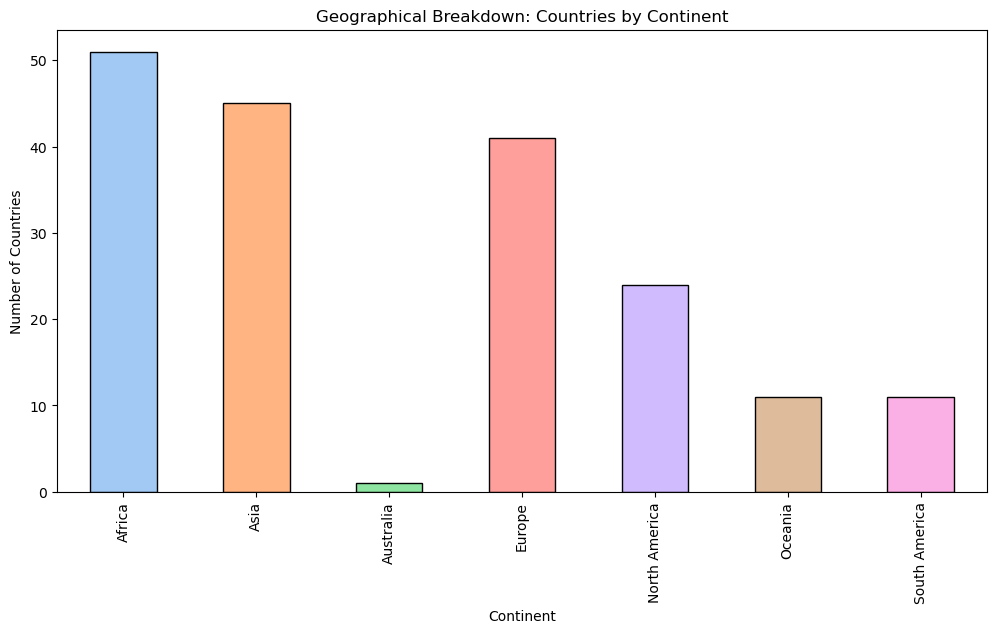

In [305]:
#Count Number of Countries in every Continent
continent_countries = inflation['Continent'].groupby(inflation['Continent']).count()
palette = sns.color_palette("pastel", 7)
continent_countries.plot(kind='bar',figsize=(12, 6),color = palette, edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title("Geographical Breakdown: Countries by Continent")

plt.show()

In [31]:
display(Markdown('## **Average Inflation by Continent** ##'))

## **Average Inflation by Continent** ##

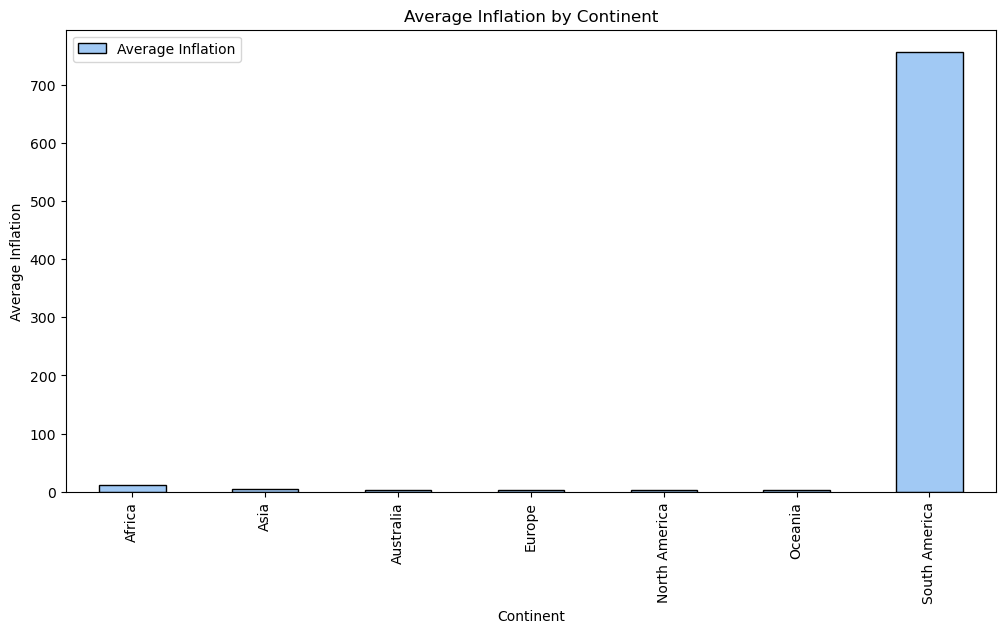

In [308]:
average_continent_inflation = inflation.groupby('Continent')['Average Inflation'].mean().to_frame()
average_continent_inflation.reset_index(inplace =False)
average_continent_inflation.plot(kind='bar', figsize =(12,6), color = palette, edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Average Inflation')
plt.title('Average Inflation by Continent')

# Show the plot
display(average_continent_inflation.style.background_gradient(cmap ='Reds'))
plt.show()


In [33]:
display(Markdown('## **Average GDP by Continent** ##'))

## **Average GDP by Continent** ##

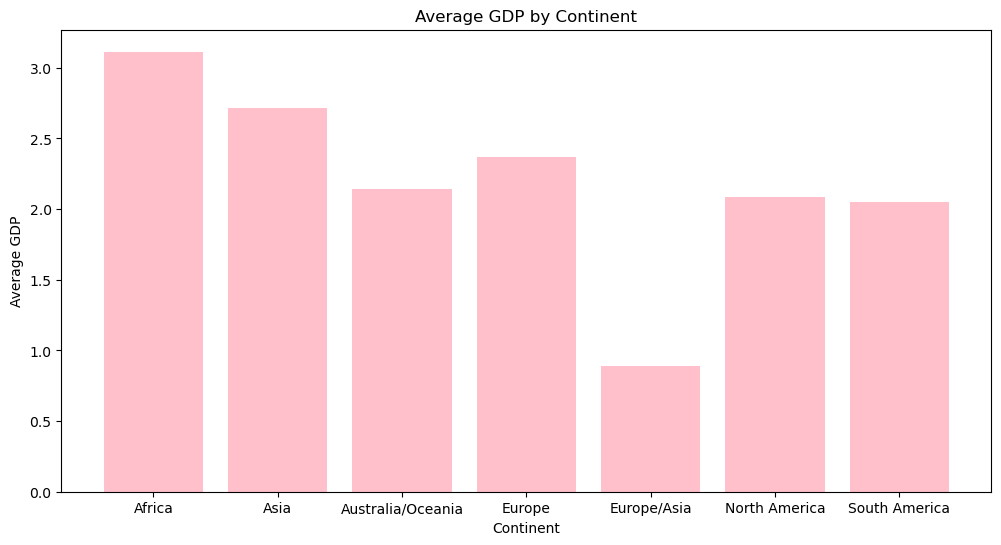

In [309]:
average_gdp_continent = gdp.groupby('Continent')['Average GDP growth'].mean().to_frame()
plt.figure(figsize =( 12, 6))
plt.bar(average_gdp_continent.index, average_gdp_continent['Average GDP growth'], color ='pink')
plt.xlabel('Continent')
plt.ylabel('Average GDP')
plt.title('Average GDP by Continent')

# Show the plot
display(average_gdp_continent.style.background_gradient(cmap ='Grays'))
plt.show()


In [35]:
display(Markdown('## **Average Unemployment by Continent** ##'))

## **Average Unemployment by Continent** ##

Text(0.5, 1.0, 'Average Unemployment by Continent')

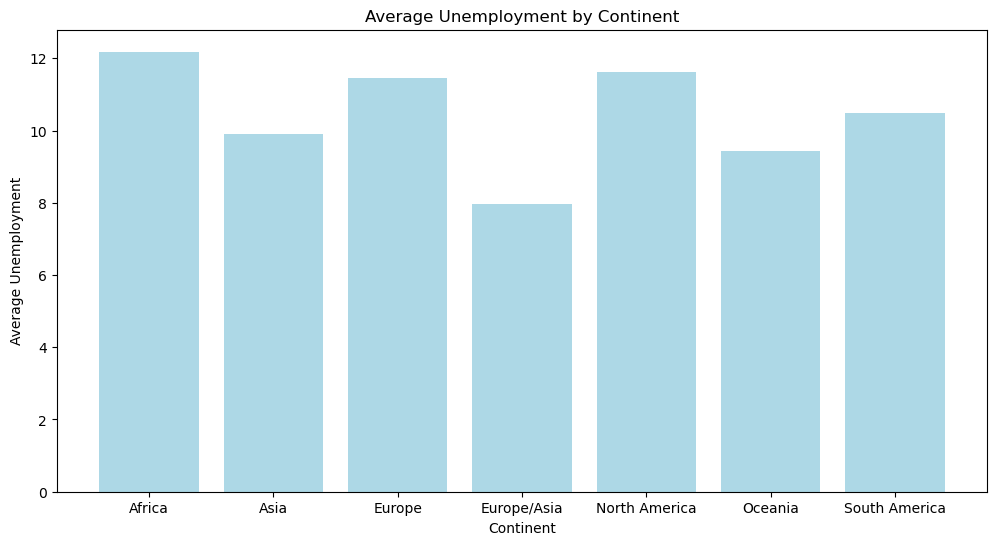

In [310]:
unemployment_continent = unemployment.groupby('Continent')['Average Unemployment'].mean().to_frame()
plt.figure(figsize = (12,6))

display(unemployment_continent.style.background_gradient(cmap ='Blues'))
plt.bar(unemployment_continent.index, unemployment_continent['Average Unemployment'], color ='lightblue')
plt.xlabel('Continent')
plt.ylabel('Average Unemployment')
plt.title('Average Unemployment by Continent')

<div style='background-color:#CDC1FF; padding :5px; font-size: 24px; color :black ; text-align:center'>
     <strong>  Insights Levels across Countries </strong>
</div>
     

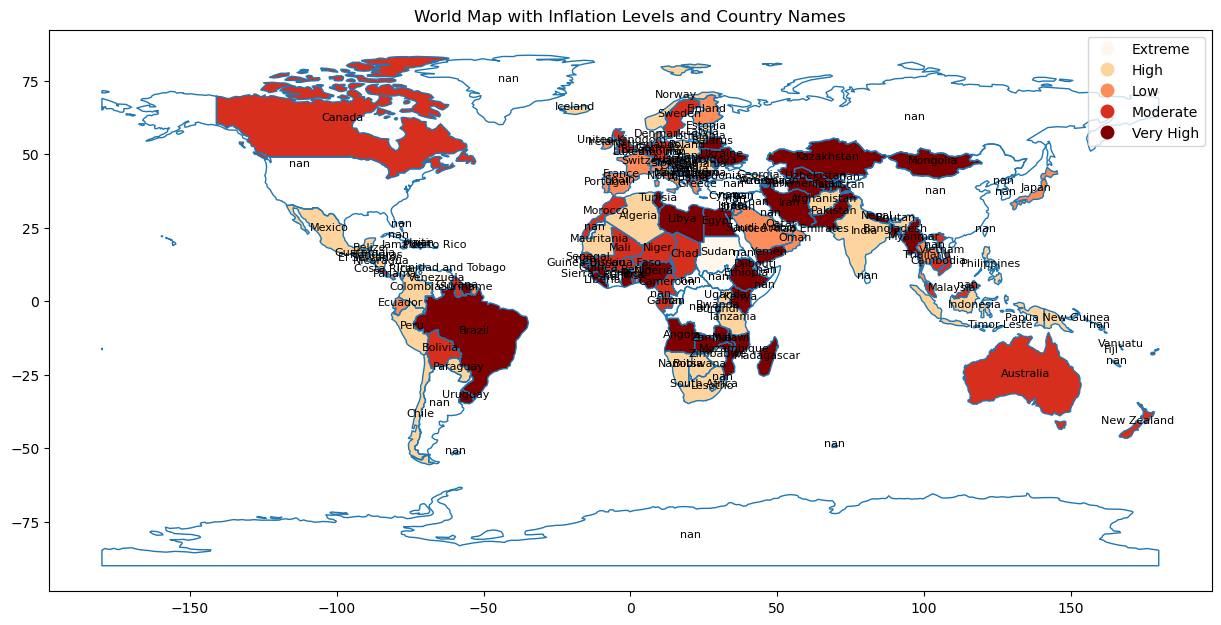

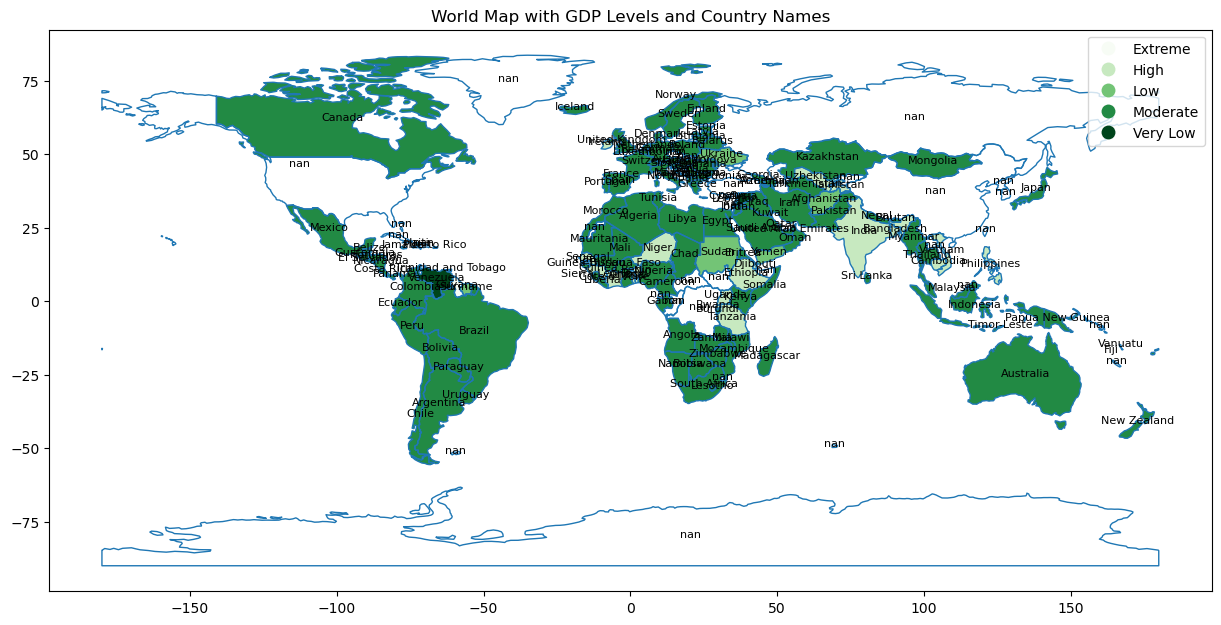

In [69]:
world = gpd.read_file(r"C:\Users\HP\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")
world_inflation = world.merge(inflation, how='left', left_on='NAME', right_on='Country Name')

# Plot the map using Inflation_Level for coloring
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)  # Plot country boundaries

# Plot the inflation levels (no custom legend parameters)
world_inflation.plot(column='Inflation_Level', ax=ax, legend=True, cmap='OrRd')

# Add country names
for x, y, label in zip(world_inflation.geometry.centroid.x, world_inflation.geometry.centroid.y, world_inflation['Country Name']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Show the plot
plt.title('World Map with Inflation Levels and Country Names')
plt.show()


world_inflation = world.merge(gdp, how='left', left_on='NAME', right_on='Country Name')

# Plot the map using Inflation_Level for coloring
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)  # Plot country boundaries

# Plot the inflation levels (no custom legend parameters)
world_inflation.plot(column='Average GDP level', ax=ax, legend=True, cmap='Greens')

# Add country names
for x, y, label in zip(world_inflation.geometry.centroid.x, world_inflation.geometry.centroid.y, world_inflation['Country Name']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Show the plot
plt.title('World Map with GDP Levels and Country Names')
plt.show()

In [39]:
display(Markdown('## **Global Economic Insights: Inflation, GDP, and Unemployment Distribution across Countries** ##'))

## **Global Economic Insights: Inflation, GDP, and Unemployment Distribution across Countries** ##

## **Country-Level Economic Analysis: Inflation, GDP, and Unemployment Overview** ##



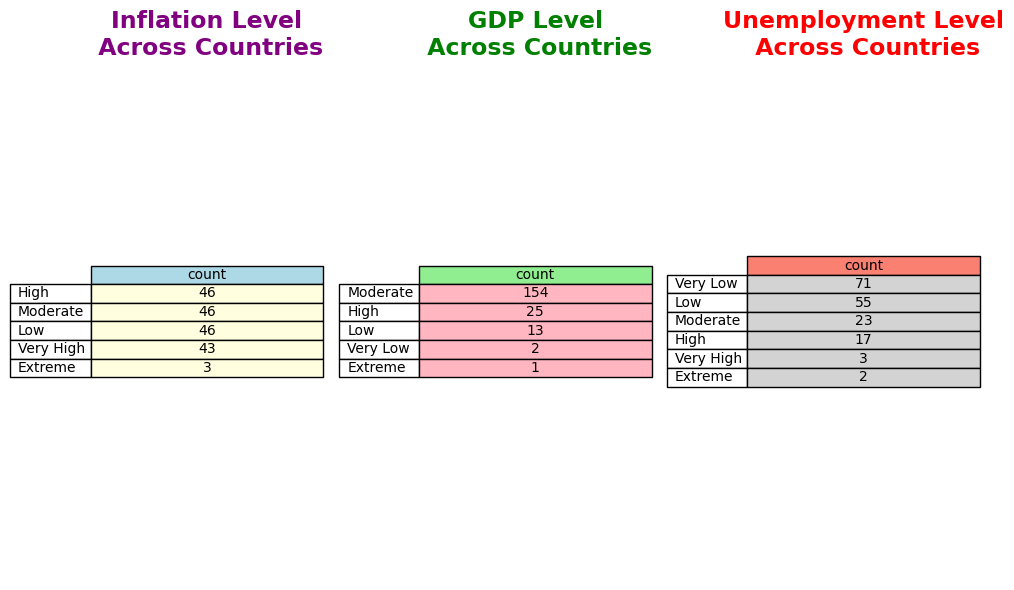

## **Country-Level Economic Analysis: Inflation, GDP, and Unemployment Overview** ##



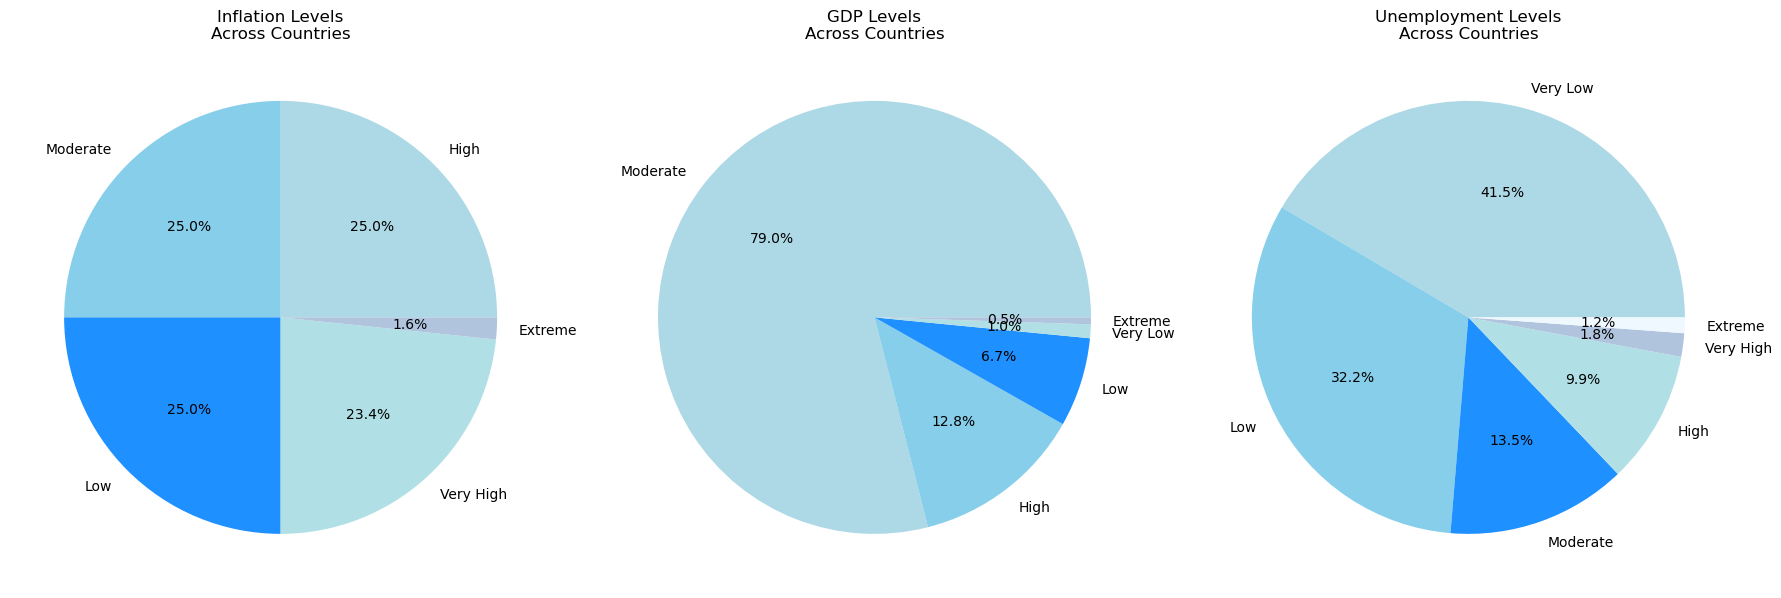

In [40]:
inflation_level = pd.DataFrame(inflation['Inflation_Level'].value_counts())
inflation_level.rename(columns={'count':'Number of Countries'})
gdp_level = pd.DataFrame(gdp['Average GDP level'].value_counts())
gdp_level.rename(columns={'count':'Number of Countrie'})
r = unemployment.groupby('Country Name')[['Average Unemployment']].mean()
r =pd.DataFrame(r)
bins = np.linspace(min(r['Average Unemployment']), max(r['Average Unemployment']), 7)
group_names = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']
r['Unemployment Level'] = pd.cut(r['Average Unemployment'], bins, labels = group_names, include_lowest =True)
unemployment_level=pd.DataFrame(r['Unemployment Level'].value_counts())
unemployment_level.rename(columns={'count':'Number of Countries'})

fig, axs = plt.subplots(1, 3, figsize=(10, 6))

display(Markdown('## **Country-Level Economic Analysis: Inflation, GDP, and Unemployment Overview** ##\n\n'))
print('')
# Table 1: Inflation Level
axs[0].table(cellText=inflation_level.values, colLabels=inflation_level.columns, rowLabels=inflation_level.index, 
             cellLoc='center', loc='center', colColours=['lightblue']*len(inflation_level.columns), 
             cellColours=[['lightyellow']*len(inflation_level.columns) for _ in range(len(inflation_level))])
axs[0].set_title('Inflation Level\n Across Countries', fontdict={'fontsize': 17, 'fontweight': 'bold', 'color': 'purple'})
axs[0].axis('off')

# Table 2: GDP Level
axs[1].table(cellText=gdp_level.values, colLabels=gdp_level.columns, rowLabels=gdp_level.index, 
             cellLoc='center', loc='center', colColours=['lightgreen']*len(gdp_level.columns), 
             cellColours=[['lightpink']*len(gdp_level.columns) for _ in range(len(gdp_level))])
axs[1].set_title('GDP Level\n Across Countries', fontdict={'fontsize': 17, 'fontweight': 'bold', 'color': 'green'})
axs[1].axis('off')

# Table 3: Unemployment Level
axs[2].table(cellText=unemployment_level.values, colLabels=unemployment_level.columns, rowLabels=unemployment_level.index, 
             cellLoc='center', loc='center', colColours=['salmon']*len(unemployment_level.columns), 
             cellColours=[['lightgray']*len(unemployment_level.columns) for _ in range(len(unemployment_level))])
axs[2].set_title('Unemployment Level\n Across Countries', fontdict={'fontsize': 17, 'fontweight': 'bold', 'color': 'red'})
axs[2].axis('off')
plt.tight_layout()
plt.show()
display(Markdown('## **Country-Level Economic Analysis: Inflation, GDP, and Unemployment Overview** ##\n\n'))
print(' ')
plt.figure(figsize=(18, 6)) 
colors = ["#ADD8E6","#87CEEB",  "#1E90FF",   "#B0E0E6",  "#B0C4DE",  "#F0F8FF" ]

# Plot 1: Inflation levels
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.pie(inflation_level['count'], labels=inflation_level.index, colors=colors, autopct='%1.1f%%')
plt.title('Inflation Levels\nAcross Countries')

# Plot 2: GDP levels
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.pie(gdp_level['count'], labels=gdp_level.index, colors=colors, autopct='%1.1f%%')
plt.title('GDP Levels\nAcross Countries')

# Plot 3: Unemployment levels
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.pie(unemployment_level['count'], labels=unemployment_level.index, colors=colors, autopct='%1.1f%%')
plt.title('Unemployment Levels\nAcross Countries')

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

<div style='background-color:#008080; padding :5px; font-size: 24px; color :white ; text-align:center'>
     <strong> Insights Levels across Continents </strong>
</div>
     

In [41]:
display(Markdown('## **Continental Overview of Economic Indicators: Inflation, GDP, and Unemployment.** ##'))

## **Continental Overview of Economic Indicators: Inflation, GDP, and Unemployment.** ##

## **Inflation Level Distribution Across Continents** ##

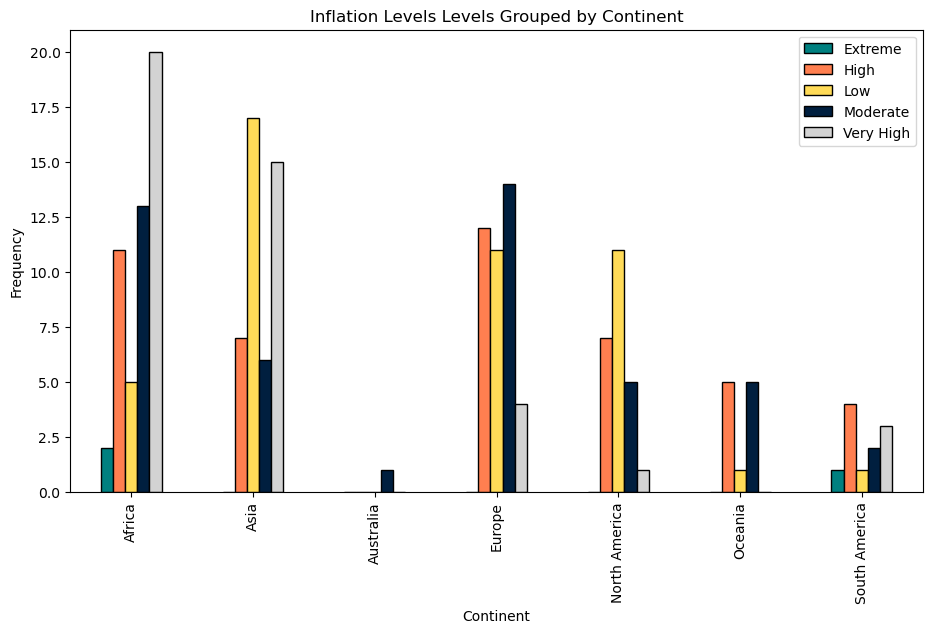

-----------------------------------------------------------------------------------------------------------------------------------------------


## **Growth Domestic Product Level Distribution Across Continents** ##

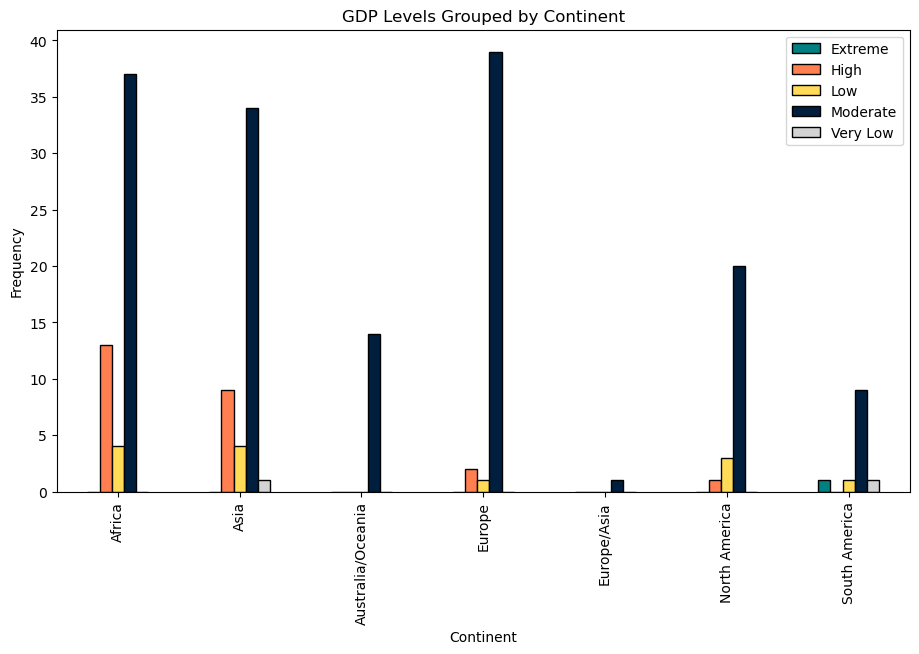

-----------------------------------------------------------------------------------------------------------------------------------------------


## **Unemployment Level Distribution Across Continents** ##

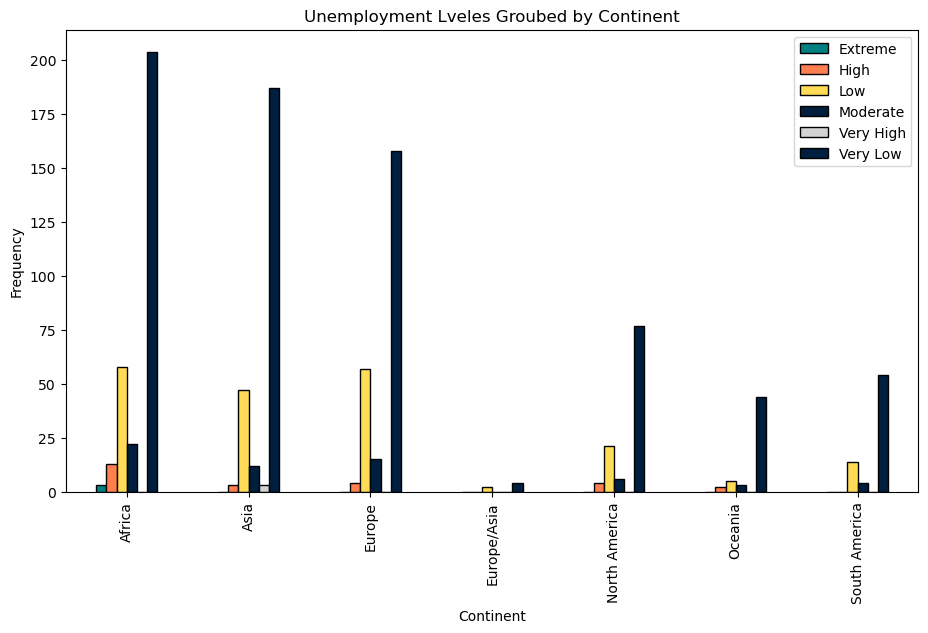

-----------------------------------------------------------------------------------------------------------------------------------------------
	


In [42]:
# get the dummies for the first table inflation:
display(Markdown('## **Inflation Level Distribution Across Continents** ##'))
dummies_inflation = pd.get_dummies(inflation['Inflation_Level'])
dummies_inflation['Continent'] = inflation['Continent']
grouped_inflation = dummies_inflation.groupby('Continent').sum()
grouped_inflation.plot(kind='bar', stacked=False, figsize=(11, 6), color=['#008080', '#FF7F50', '#FFDB58', '#001F3F', '#D3D3D3'], edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Inflation Levels Levels Grouped by Continent')
plt.show()
print('-----------------------------------------------------------------------------------------------------------------------------------------------')

# get the dummies for the second table gdp:
display(Markdown('## **Growth Domestic Product Level Distribution Across Continents** ##'))
dummies_gdp = pd.get_dummies(gdp['Average GDP level'])
dummies_gdp['Continent']=gdp['Continent']
grouped_gdp = dummies_gdp.groupby('Continent').sum()
grouped_gdp.plot(kind='bar', stacked = False,figsize=(11, 6), color = ['#008080', '#FF7F50', '#FFDB58', '#001F3F', '#D3D3D3'],  edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('GDP Levels Grouped by Continent')
plt.show()
print('-----------------------------------------------------------------------------------------------------------------------------------------------')

# get the dummies for the third table unemployment:
display(Markdown('## **Unemployment Level Distribution Across Continents** ##'))
dummies_unemployment = pd.get_dummies(unemployment['Unemployment Level'])
dummies_unemployment['Continent'] = unemployment['Continent']
dummies_unemployment = dummies_unemployment.groupby('Continent').sum()
dummies_unemployment.plot(kind='bar', stacked =False, figsize = (11,6), color=['#008080', '#FF7F50', '#FFDB58', '#001F3F', '#D3D3D3','#001F3F', '#D3D3D3'],
                          edgecolor='black')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Unemployment Lveles Groubed by Continent')
plt.show()
print('-----------------------------------------------------------------------------------------------------------------------------------------------')
print('\t')


<div style='background-color:#C1ECE4; padding :5px; font-size: 20px; color :#302387; text-align:center'>
     <strong> Economic Indicators: A Comparative Analysis of Top 10 and Bottom 10 Countries </strong>
</div>
     

In [43]:
display(Markdown('## **Comparison of Inflation, GDP, and Unemployment Top 10 VS Bottom 10 Countries** ##'))

## **Comparison of Inflation, GDP, and Unemployment Top 10 VS Bottom 10 Countries** ##

## **Comparison of Inflation, GDP, and Unemployment** ##

## **Top 10 Countries** ##

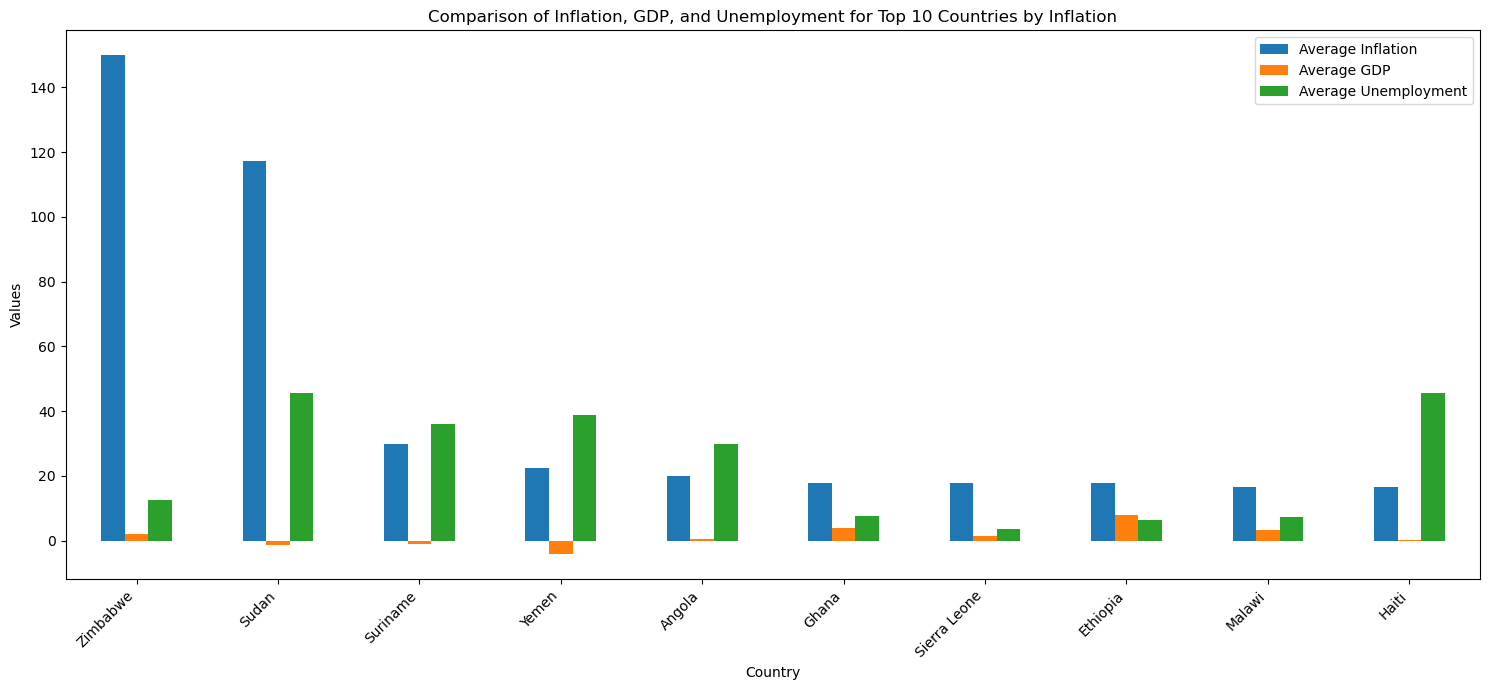

## **Bottom 10 Countries** ##

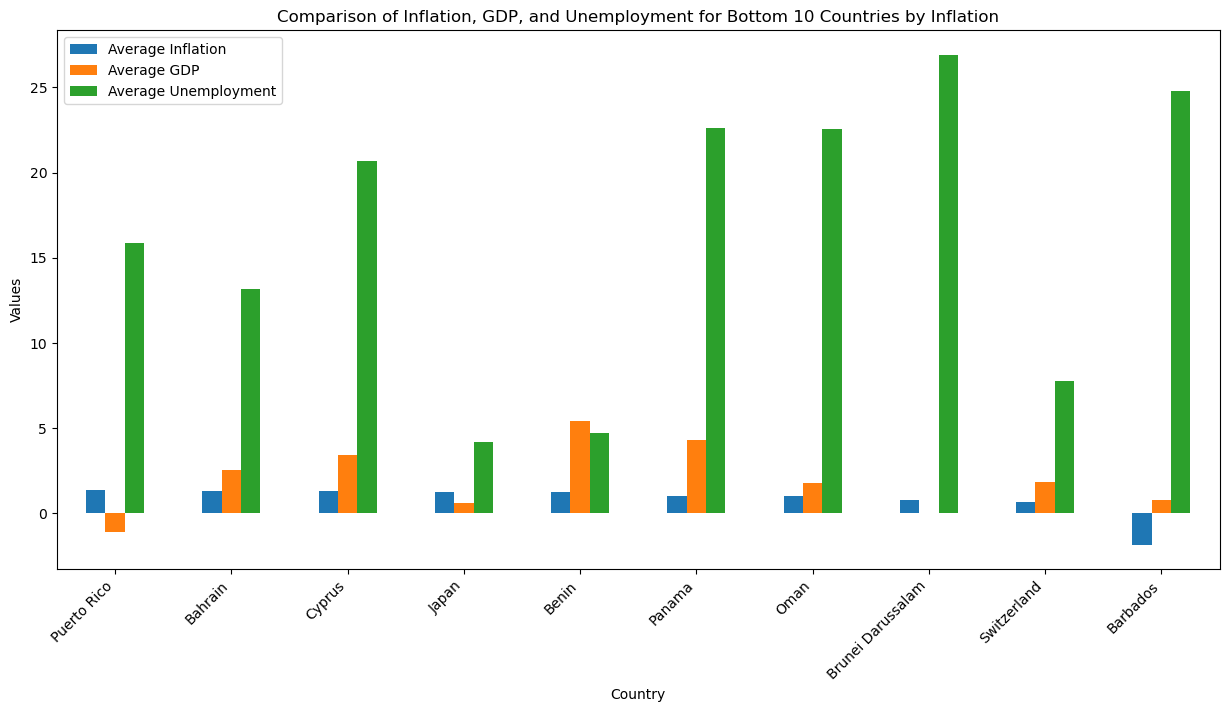

In [44]:
comparison =[]
for country in inflation['Country Name']:
    if country in gdp['CountryName'].values:
        if country in unemployment['Country Name'].values:
            avg_inf = inflation[inflation['Country Name'] == country]['Average Inflation'].values[0]
            avg_gdp = gdp[gdp['CountryName'] == country]['Average GDP growth'].values[0]
            avg_unemp = unemployment[unemployment['Country Name'] == country]['Average Unemployment'].values[0]
            comparison.append({'Country': country, 'Average Inflation': avg_inf, 'Average GDP': avg_gdp, 'Average Unemployment':avg_unemp})


matching_df = pd.DataFrame(comparison)
matching_df_sorted = matching_df.sort_values(by='Average Inflation', ascending=False)

matching_df_sorted.set_index('Country', inplace=True)
matching_df_sorted_largest = matching_df_sorted.head(10)

display(Markdown('## **Comparison of Inflation, GDP, and Unemployment** ##'))
display(Markdown('## **Top 10 Countries** ##'))
# top 10
matching_df_sorted_largest[['Average Inflation', 'Average GDP', 'Average Unemployment']].plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Inflation, GDP, and Unemployment for Top 10 Countries by Inflation')
plt.xlabel('Country')
plt.ylabel('Values')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.tight_layout()  
plt.show()

display(Markdown('## **Bottom 10 Countries** ##'))
# bottom 10
matching_sorted_lowest = matching_df_sorted.tail(10)
matching_sorted_lowest[['Average Inflation', 'Average GDP', 'Average Unemployment']].plot(kind='bar', figsize=(15,7))
plt.title('Comparison of Inflation, GDP, and Unemployment for Bottom 10 Countries by Inflation');
plt.xlabel('Country')
plt.ylabel('Values')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right');

<div style='background-color:#3AA6B9; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Economic Indicators Fluctuation from 2014 to 2024 </strong>
</div>

In [45]:
display(Markdown('## **Inflation, GDP, Unemployment from 2014 to 2024 Time Series and correlation (Indicators)** ##'))

## **Inflation, GDP, Unemployment from 2014 to 2024 Time Series and correlation (Indicators)** ##

## **From 2014:2024** ##

## **Correlation:** ##

## **Inflation, GDP, and Unemployment Fluctuations from 2014 to 2024** ##

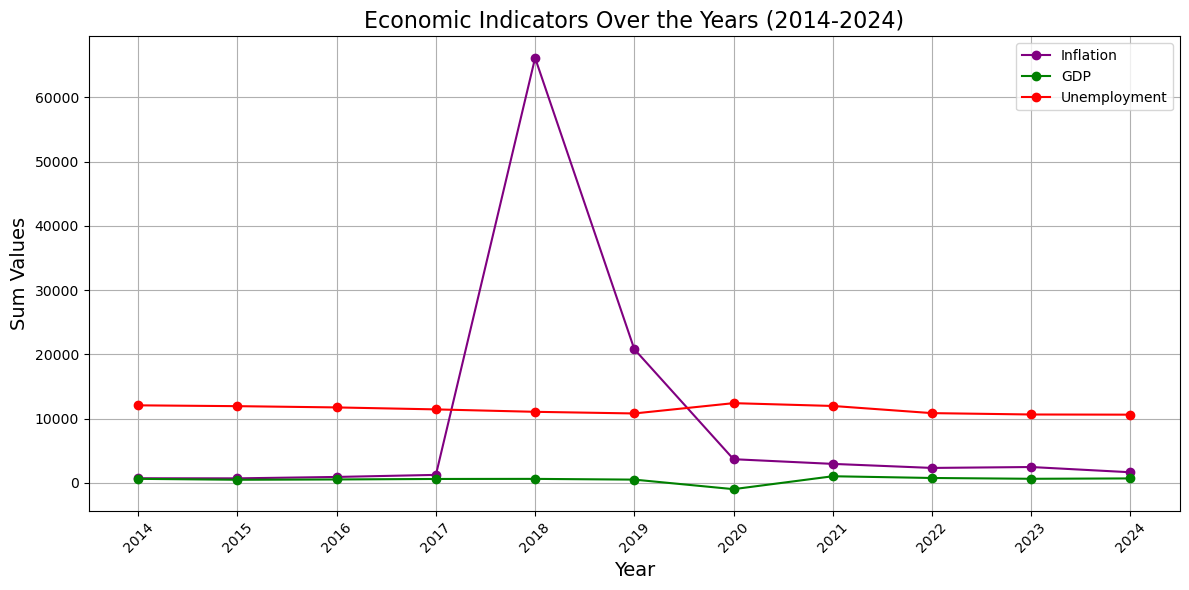

In [314]:

# Prepare the data (summing values for each year)
inflation_years = inflation[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].sum()
gdp_years = gdp[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].sum()
unemployment_years = unemployment[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].sum()

data = pd.DataFrame({
    'Inflation': inflation_years,
    'GDP': gdp_years,
    'Unemployment': unemployment_years
})

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot each line
plt.plot(years, inflation_years, label='Inflation', marker='o', color='purple')  
plt.plot(years, gdp_years, label='GDP', marker='o', color='green')              
plt.plot(years, unemployment_years, label='Unemployment', marker='o', color='red') 
# Adding titles and labels
plt.title('Economic Indicators Over the Years (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sum Values', fontsize=14)
plt.xticks(rotation=45) 
plt.legend()
plt.grid() 
plt.tight_layout()  

display(Markdown('## **From 2014:2024** ##'))
# Print the correlation matrix

display(Markdown('## **Correlation:** ##'))
display(correlation_matrix.style.background_gradient(cmap ='Purples'))
display(Markdown('## **Inflation, GDP, and Unemployment Fluctuations from 2014 to 2024** ##'))
plt.show()

<div style='background-color:#3AA6B9; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Economic Indicators Fluctuation from 2014 to 2024 After Execluding Outlire </strong>
</div>

In [47]:
display(Markdown('## **The effects without  Venezuela and Zimbabwe	(2018: 2024)** ##'))

## **The effects without  Venezuela and Zimbabwe	(2018: 2024)** ##

In [74]:
display(inflation_.describe(include = 'all').style.background_gradient(cmap ='Blues'))
# Find the maximum inflation values for the specified years
max_ = inflation[['2018', '2019', '2020', '2021', '2022', '2023', '2024']].max()

# Create a mask for countries that have the maximum inflation for any year
mask = (inflation[['2018', '2019', '2020', '2021', '2022', '2023', '2024']] == max_)

# Select countries where the mask is True for any of the inflation years
result = inflation[mask.any(axis=1)][['Country Name', '2018', '2019', '2020', '2021', '2022', '2023', '2024']]

result=result.T
# Display the result
display(result.style.background_gradient(cmap ='Purples'))

## **Before and After Execluding Zimbabwe	and Venezuela (Inflation)** ##

## **Inflation(witout Zimbabwe and  Venezuela), GDP, Unemployment form 2014 to 2024** ##

Text(0.5, 1.0, 'unemployment from 2014 to 2024')

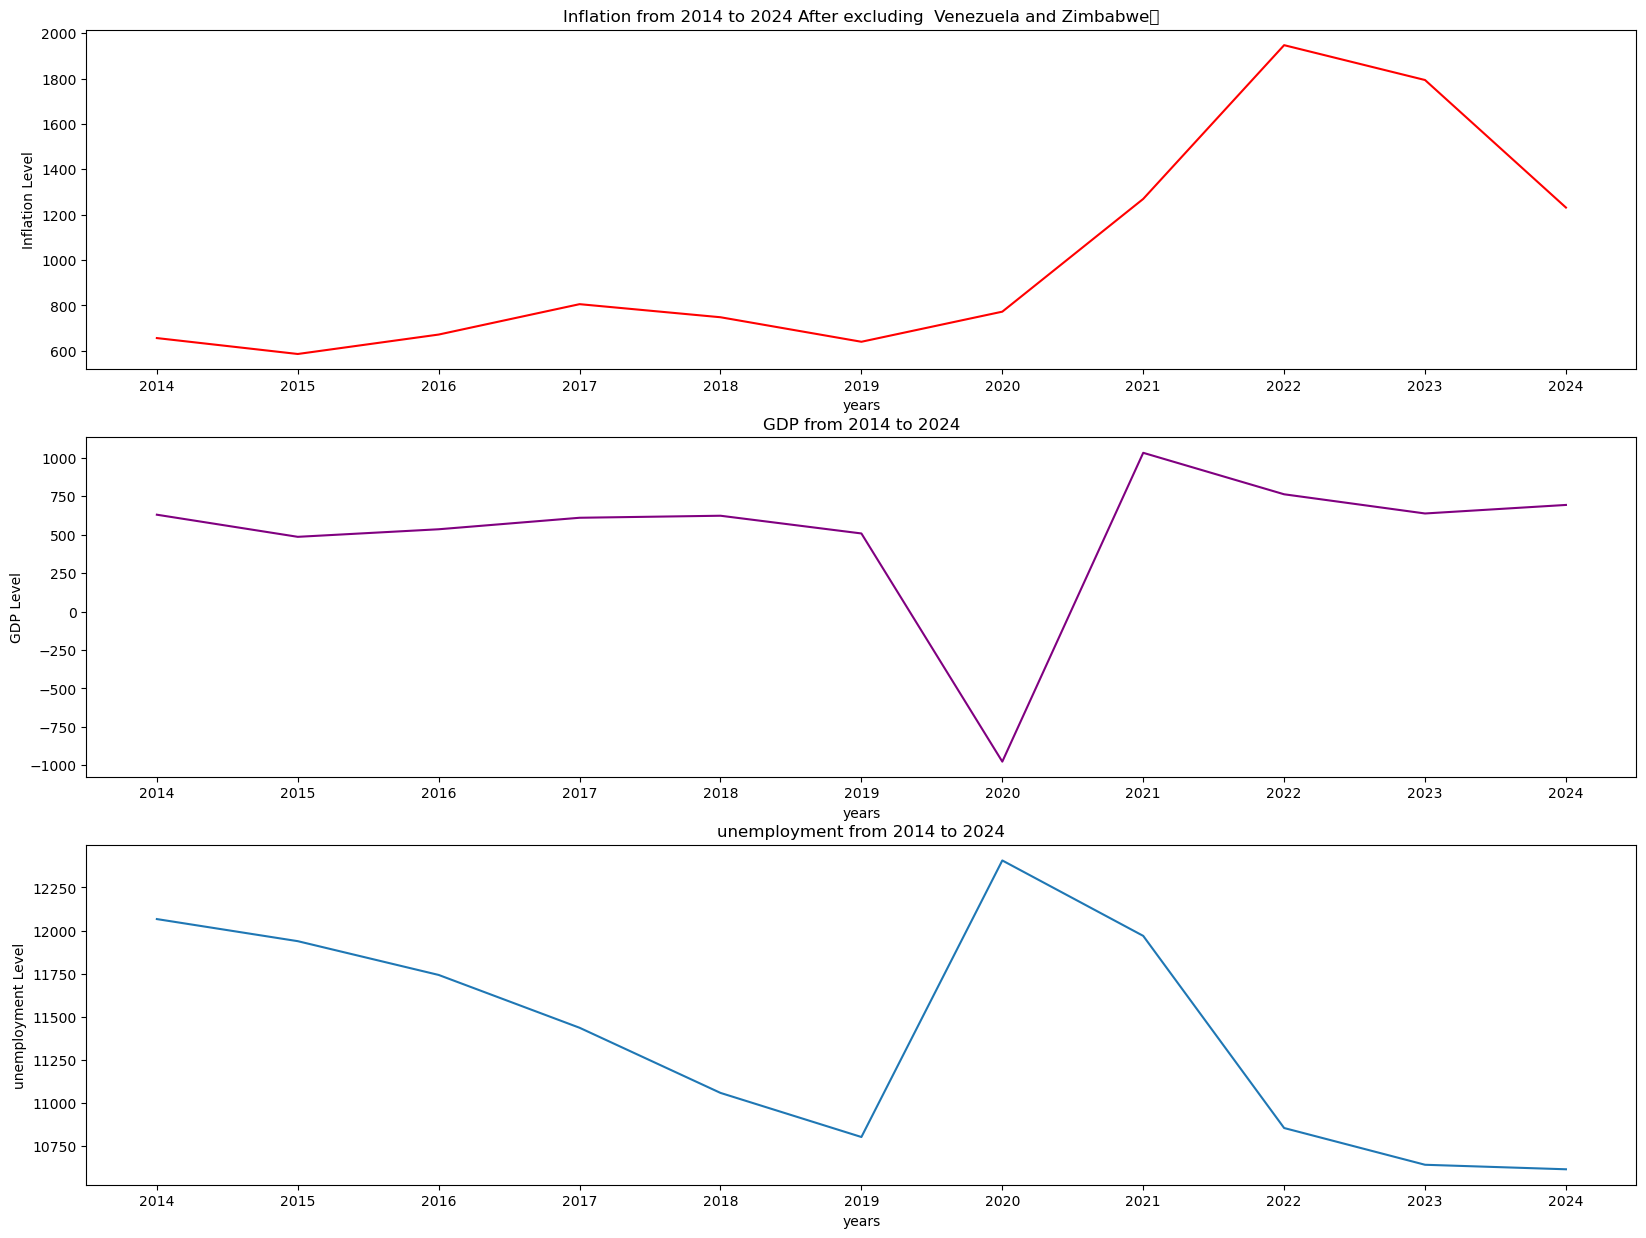

In [317]:
r =pd.DataFrame({'totla before':[66132.63,20801.2,3684.84,2956.36,2326.81,2467.8,1653.7,], 'total After excluding':[
    747.93, 639.9,772.54,1269.36,1946.91, 1793.30,1231.30] })
r.index =[2018,2019,2020,2021,2022,2023,2024]
r

inflation_o = inflation[~inflation['Country Name'].isin(['Venezuela', 'Zimbabwe'])][['Country Name', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']]
# Display the summary statistics
inflation_o.describe()
inflation_year_without = inflation_o[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].sum()

display(Markdown('## **Before and After Execluding Zimbabwe	and Venezuela (Inflation)** ##'))
display(r.style.background_gradient(cmap ='Greens'))


display(Markdown('## **Inflation(witout Zimbabwe and  Venezuela), GDP, Unemployment form 2014 to 2024** ##'))
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(inflation_year_without, color = 'red')
plt.xlabel('years')
plt.ylabel('Inflation Level')
plt.title('Inflation from 2014 to 2024 After excluding  Venezuela and Zimbabwe	')

plt.subplot(3,1,2)
plt.plot(gdp_years, color = 'purple')
plt.xlabel('years')
plt.ylabel('GDP Level')
plt.title('GDP from 2014 to 2024')

plt.subplot(3,1,3)
plt.plot(unemployment_years)
plt.xlabel('years')
plt.ylabel('unemployment Level')
plt.title('unemployment from 2014 to 2024')

<div style='background-color:#57CC99; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Exploring Relationships: Indicators(inflation, GDP and unemployment) Over the Last Four Years </strong>
</div>

## **Inflation, GDP, Unemployment Relationships:** ##

.......................................................................


## **1)Inflation and GDP** ##

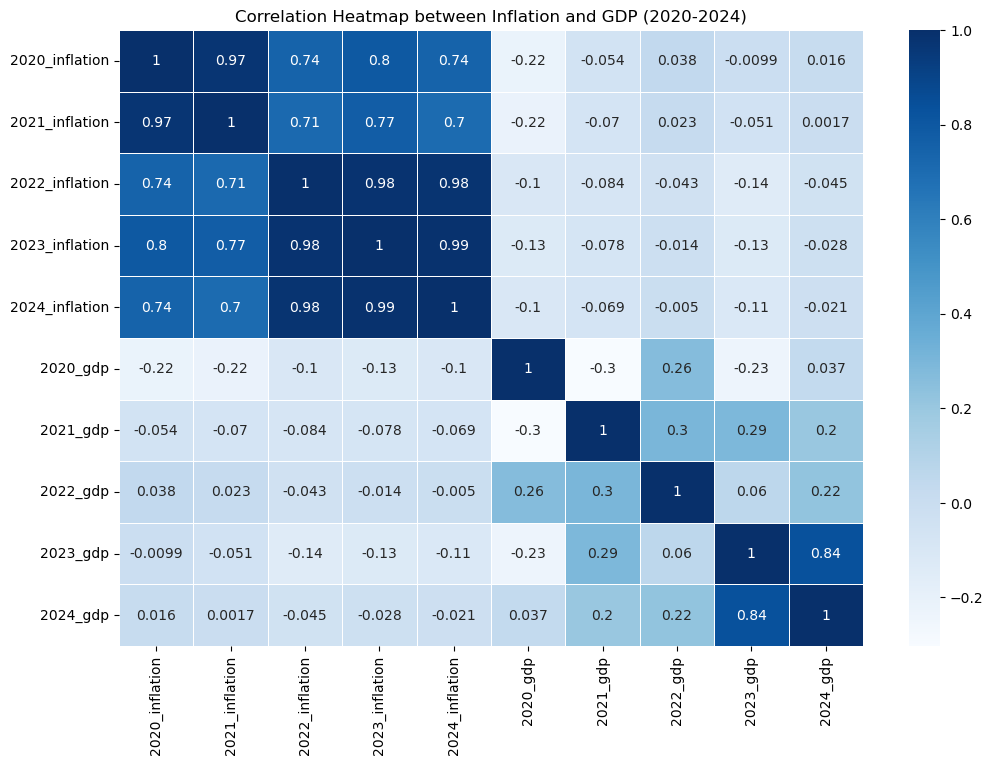

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## **2)Inflation and Unemployment** ##

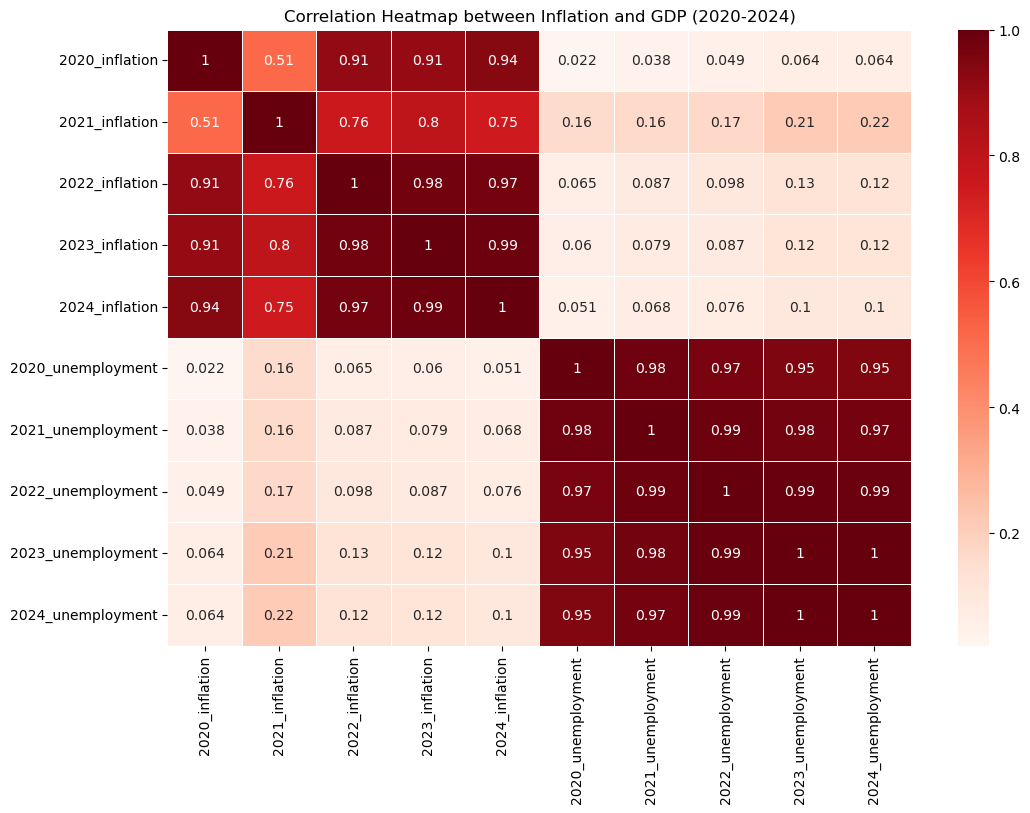

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## **3)Unemployment and GDP** ##

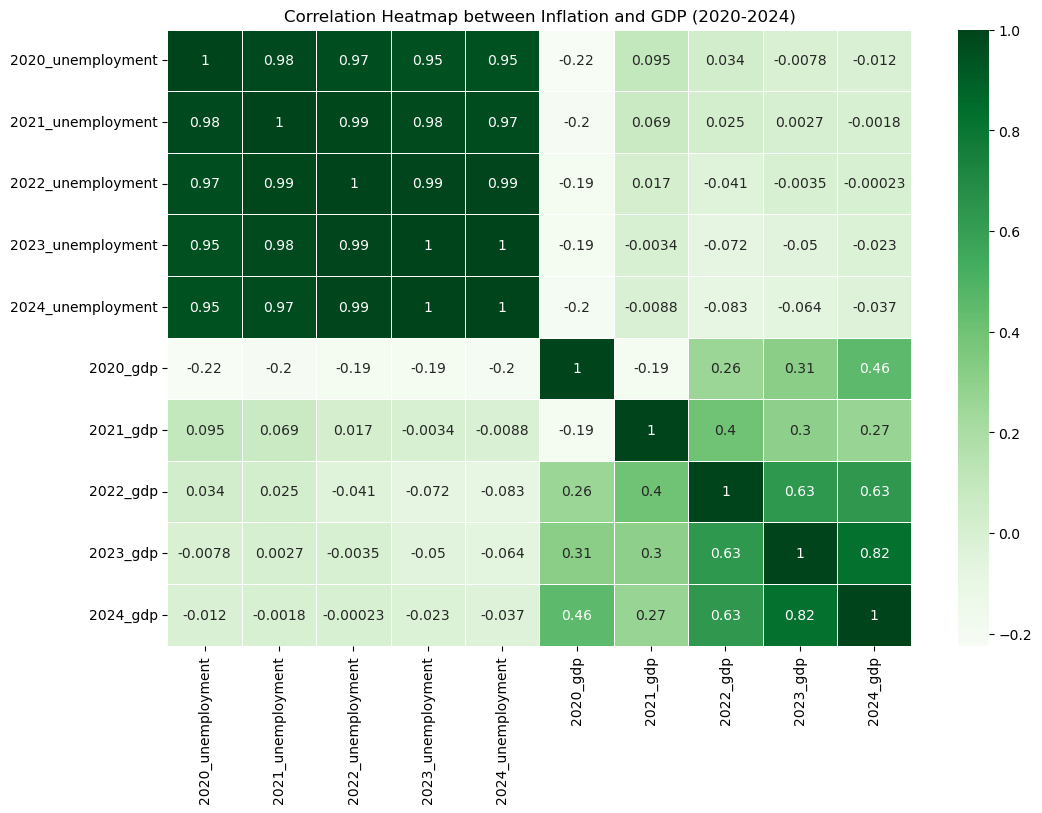

In [6]:
display(Markdown('## **Inflation, GDP, Unemployment Relationships:** ##'))
print('.......................................................................')

gdp.rename(columns ={'CountryName':'Country Name'}, inplace = True)
# Select only the columns you need for the analysis (years 2014-2024)
inflation_columns = ['Country Name',  '2020', '2021', '2022', '2023', '2024']
gdp_columns = ['Country Name', '2020', '2021', '2022', '2023', '2024']

inflation_df = inflation[inflation_columns]
gdp_df = gdp[gdp_columns]

combined_df = pd.merge(inflation_df, gdp_df, on ='Country Name',suffixes =('_inflation', '_gdp'))
corr_matrix = combined_df[[col for col in combined_df.columns if col != 'Country Name']].corr()

display(Markdown('## **1)Inflation and GDP** ##'))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title('Correlation Heatmap between Inflation and GDP (2020-2024)')
plt.show()

unemp_group = unemployment.groupby('Country Name')[['2014', '2015', '2016', '2017',  '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean().reset_index()
unemployment_columns = ['Country Name', '2020', '2021', '2022', '2023', '2024']
unemployment_df = unemp_group[unemployment_columns]

combined_df_2 = pd.merge(inflation_df, unemployment_df, on ='Country Name', suffixes = ('_inflation', '_unemployment'))
corr_matrix_2 = combined_df_2[[col for col in combined_df_2.columns if col != 'Country Name']].corr()

print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
display(Markdown('## **2)Inflation and Unemployment** ##'))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap="Reds", linewidths=0.5)
plt.title('Correlation Heatmap between Inflation and GDP (2020-2024)')
plt.show()

combined_df_3 = pd.merge(unemployment_df, gdp_df, on ='Country Name', suffixes =('_unemployment', '_gdp'))
corr_matrix_3 = combined_df_3[[col for col in combined_df_3.columns if col != 'Country Name']].corr()

print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
display(Markdown('## **3)Unemployment and GDP** ##'))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_3, annot=True, cmap="Greens", linewidths=0.5)
plt.title('Correlation Heatmap between Inflation and GDP (2020-2024)')
plt.show()


<div style='background-color:#789DBC; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> testing the relationship btween the indicators among countries </strong>
</div>

In [53]:
display(Markdown('## **Distribution of the values of Inflation, GDP, Unemployment across Countries** ##'))

## **Distribution of the values of Inflation, GDP, Unemployment across Countries** ##

## **Inflation and GDP relation** ##

## **# Correlation:** ##

Cofficent of Correlation:-0.141 (week)
 Cofficeint of Determination: 0.02
 p_value 0.105


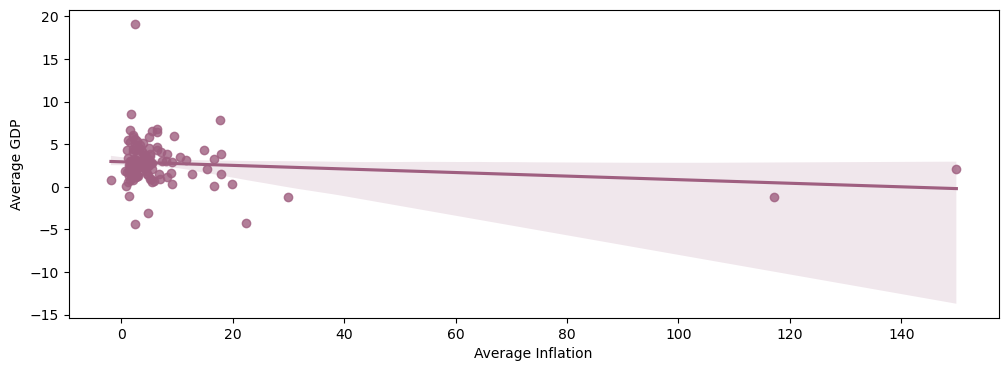

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## **Inflation and Unemplyment relation** ##

## **# Correlation:** ##

Cofficent of Correlation:0.06 (week)
 Cofficeint of Determination: 0.004
 p_value 0.49


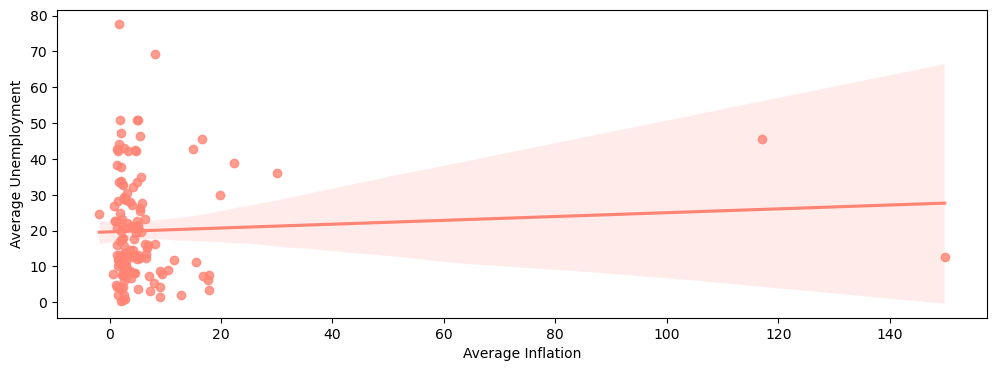

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## **GDP and Unemplyment relation** ##

## **# Correlation:** ##

Cofficent of Correlation:0.06 (week)
 Cofficeint of Determination: 0.004
 p_value 0.49


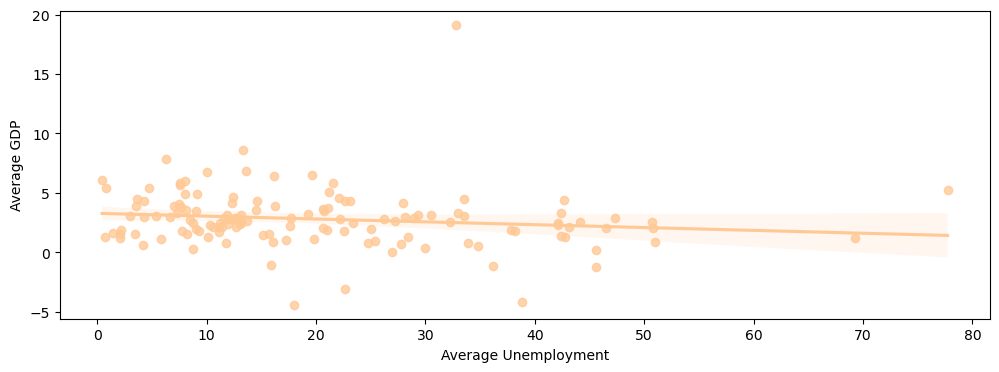

.                                   ::::::::::::::::::::::::::::::::::::::::::::::::::::::                                                     .


In [10]:
matching_data = []

# Loop through the inflation DataFrame to find matches
for country in inflation['Country Name']:
    if country in gdp['Country Name'].values:
        if country in unemployment['Country Name'].values:
            avg_inflation = inflation[inflation['Country Name'] == country]['Average Inflation'].values[0]
            avg_gdp = gdp[gdp['Country Name'] == country]['Average GDP growth'].values[0]
            avg_unemployment = unemployment[unemployment['Country Name'] == country]['Average Unemployment'].values[0]
            matching_data.append({'Country': country, 'Average Inflation': avg_inflation, 'Average GDP': avg_gdp, 'Average Unemployment':avg_unemployment})       
# Create a DataFrame from the results
matching_df = pd.DataFrame(matching_data)


x = matching_df['Average Inflation']
z = matching_df['Average Unemployment']
y = matching_df['Average GDP']
r = pd.DataFrame({'Average Inflation':x,'Average GDP':y, 'Average Unemployment':z})
plt.figure(figsize =(12,4))
sns.regplot(x = r['Average Inflation'], y =  r['Average GDP'],data= r, color ='#9F5F80')
pearson_coef1, p_value1 = stats.pearsonr(r['Average Inflation'], r['Average GDP'])
display(Markdown('## **Inflation and GDP relation** ##'))
display(Markdown('## **# Correlation:** ##'))
print(f'Cofficent of Correlation:{round(pearson_coef1, 3)} (week)\n Cofficeint of Determination: {round(pearson_coef1**2, 3)}\n p_value {round(p_value1, 3)}')
plt.show()
print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')

plt.figure(figsize =(12,4))
sns.regplot(x = r['Average Inflation'], y = r['Average Unemployment'],data= r, color ='#FF8474')
pearson_coef2, p_value2 = stats.pearsonr(r['Average Inflation'], r['Average Unemployment'])
display(Markdown('## **Inflation and Unemplyment relation** ##'))
display(Markdown('## **# Correlation:** ##'))
print(f'Cofficent of Correlation:{round(pearson_coef2, 3)} (week)\n Cofficeint of Determination: {round(pearson_coef2**2, 3)}\n p_value {round(p_value2, 3)}')
plt.show()
print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')

plt.figure(figsize =(12,4))
sns.regplot(x = r['Average Unemployment'], y = r['Average GDP'],data= r, color ='#FFC996')
pearson_coef3, p_value3 = stats.pearsonr(r['Average Inflation'], r['Average Unemployment'])

display(Markdown('## **GDP and Unemplyment relation** ##'))
display(Markdown('## **# Correlation:** ##'))
print(f'Cofficent of Correlation:{round(pearson_coef3, 3)} (week)\n Cofficeint of Determination: {round(pearson_coef3**2, 3)}\n p_value {round(p_value3, 3)}')
plt.show()
print('.                                   ::::::::::::::::::::::::::::::::::::::::::::::::::::::                                                     .')

<div style='background-color:#B6FFA1; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> Findg the Relationship between Inflation Levels and GDP levels </strong>
</div>

## **Chi-square statistic** ##


Chi-Square Statistic: 11.585513207642341
P-value: 0.7719859321753519
Degrees of Freedom: 16


## **Expected Frequency** ##

## **inflation level and GDP level** ##

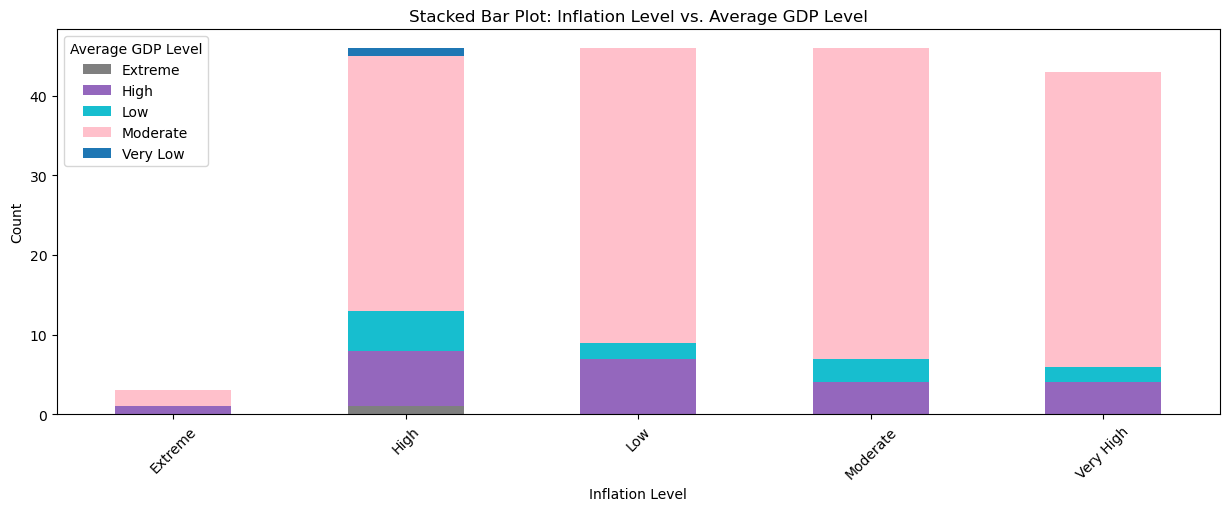

In [320]:
contiengency_table =pd.crosstab(inflation['Inflation_Level'], gdp['Average GDP level'])
styled_table = contiengency_table.style.background_gradient(cmap='Pastel1')
styled_table
display(styled_table)
chi2, p, dof, expected = chi2_contingency(contiengency_table)

display(Markdown('## **Chi-square statistic** ##'))
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


# Create a DataFrame
expected_df = pd.DataFrame(expected, columns=['Extreme', 'High', 'Low', 'Moderate', 'Very Low'])

# Apply background gradient
expected_style = expected_df.style.background_gradient(cmap='Pastel1')
display(Markdown('## **Expected Frequency** ##'))
expected_df.index = ['Extreme', 'High', 'Low', 'Moderate', 'Very Low']
expected_df.style.background_gradient(cmap='RdYlBu')
display(expected_df.style.background_gradient(cmap ='Purples'))

# Stacked bar plot of the contingency table
display(Markdown('## **inflation level and GDP level** ##'))
contiengency_table.plot(kind='bar', stacked=True, figsize=(15, 5), color =[ "#7f7f7f", "#9467bd", "#17becf","pink",  "#1f77b4"])
plt.title('Stacked Bar Plot: Inflation Level vs. Average GDP Level')
plt.xlabel('Inflation Level')
plt.ylabel('Count')
plt.legend(title='Average GDP Level')
plt.xticks(rotation=45)
plt.show()



<div style='background-color:#EEA1EB; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> Distribution of Economic Indicators Across Countries: Inflation, GDP Growth, and Unemployment Rates </strong>
</div>

## **Indicators Distribution (Inflation, GDP, Unemployment ) across Countries:** ##

## **-Inflation** ##

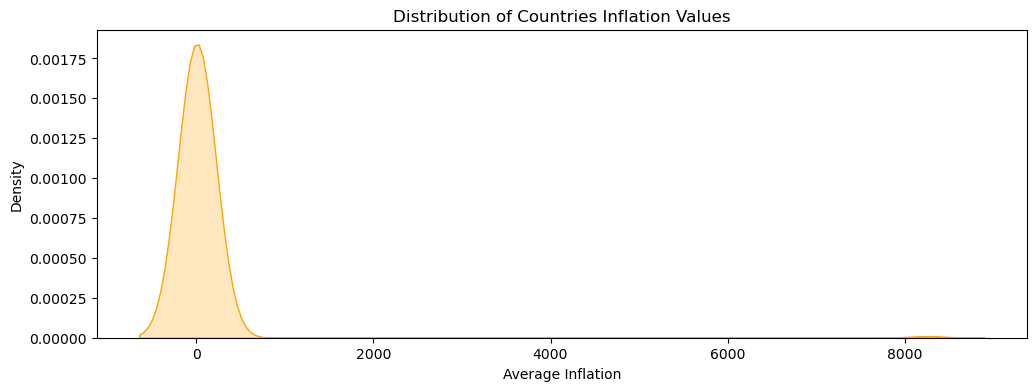

## **-GDP** ##

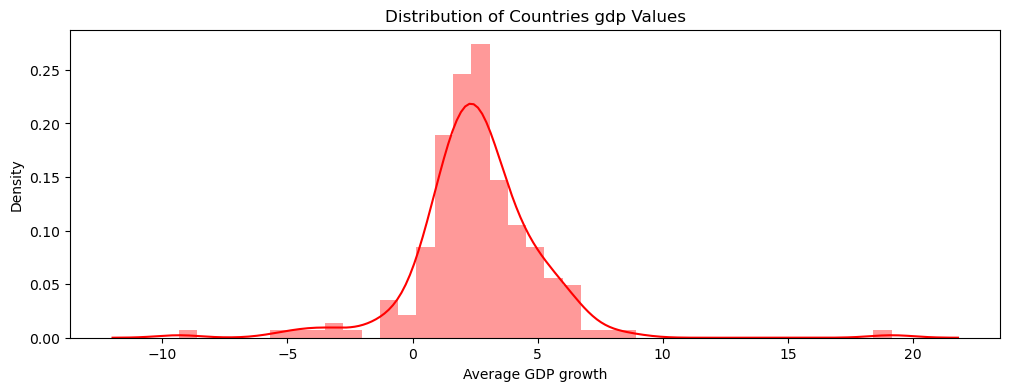

## **-Unemployment** ##

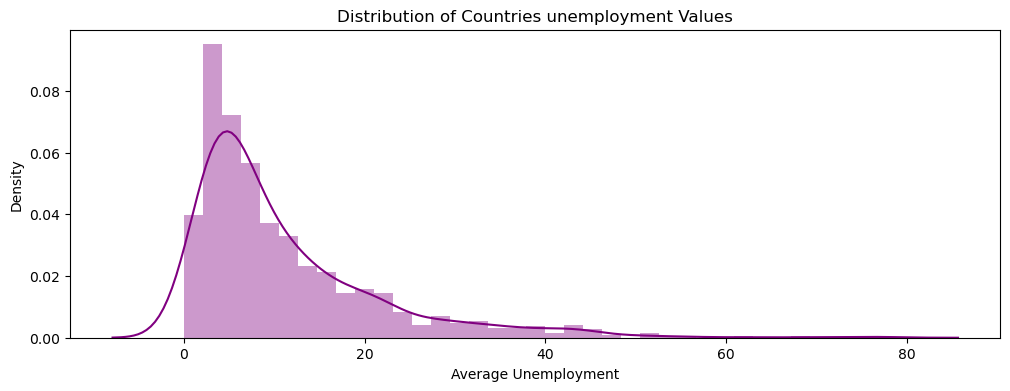

In [55]:
plt.figure(figsize =(12,4));

sns.kdeplot(inflation['Average Inflation'], fill = True, color ='orange');
plt.title('Distribution of Countries Inflation Values')
display(Markdown('## **Indicators Distribution (Inflation, GDP, Unemployment ) across Countries:** ##'))
display(Markdown('## **-Inflation** ##'))
plt.show()

plt.figure(figsize =(12,4));
sns.distplot(gdp['Average GDP growth'], hist =True, color = 'red');
plt.title('Distribution of Countries gdp Values')
display(Markdown('## **-GDP** ##'))
plt.show()

plt.figure(figsize =(12,4));
sns.distplot(unemployment['Average Unemployment'], hist =True, color ='purple');
plt.title('Distribution of Countries unemployment Values')
display(Markdown('## **-Unemployment** ##'))
plt.show();

<div style='background-color:#643579; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Distribution of Economic Indicators from 2014 to 2024: Inflation, GDP, and Unemployment Rates </strong>
</div>

## **Inflation Values Distribution from 2014 to 2024** ##

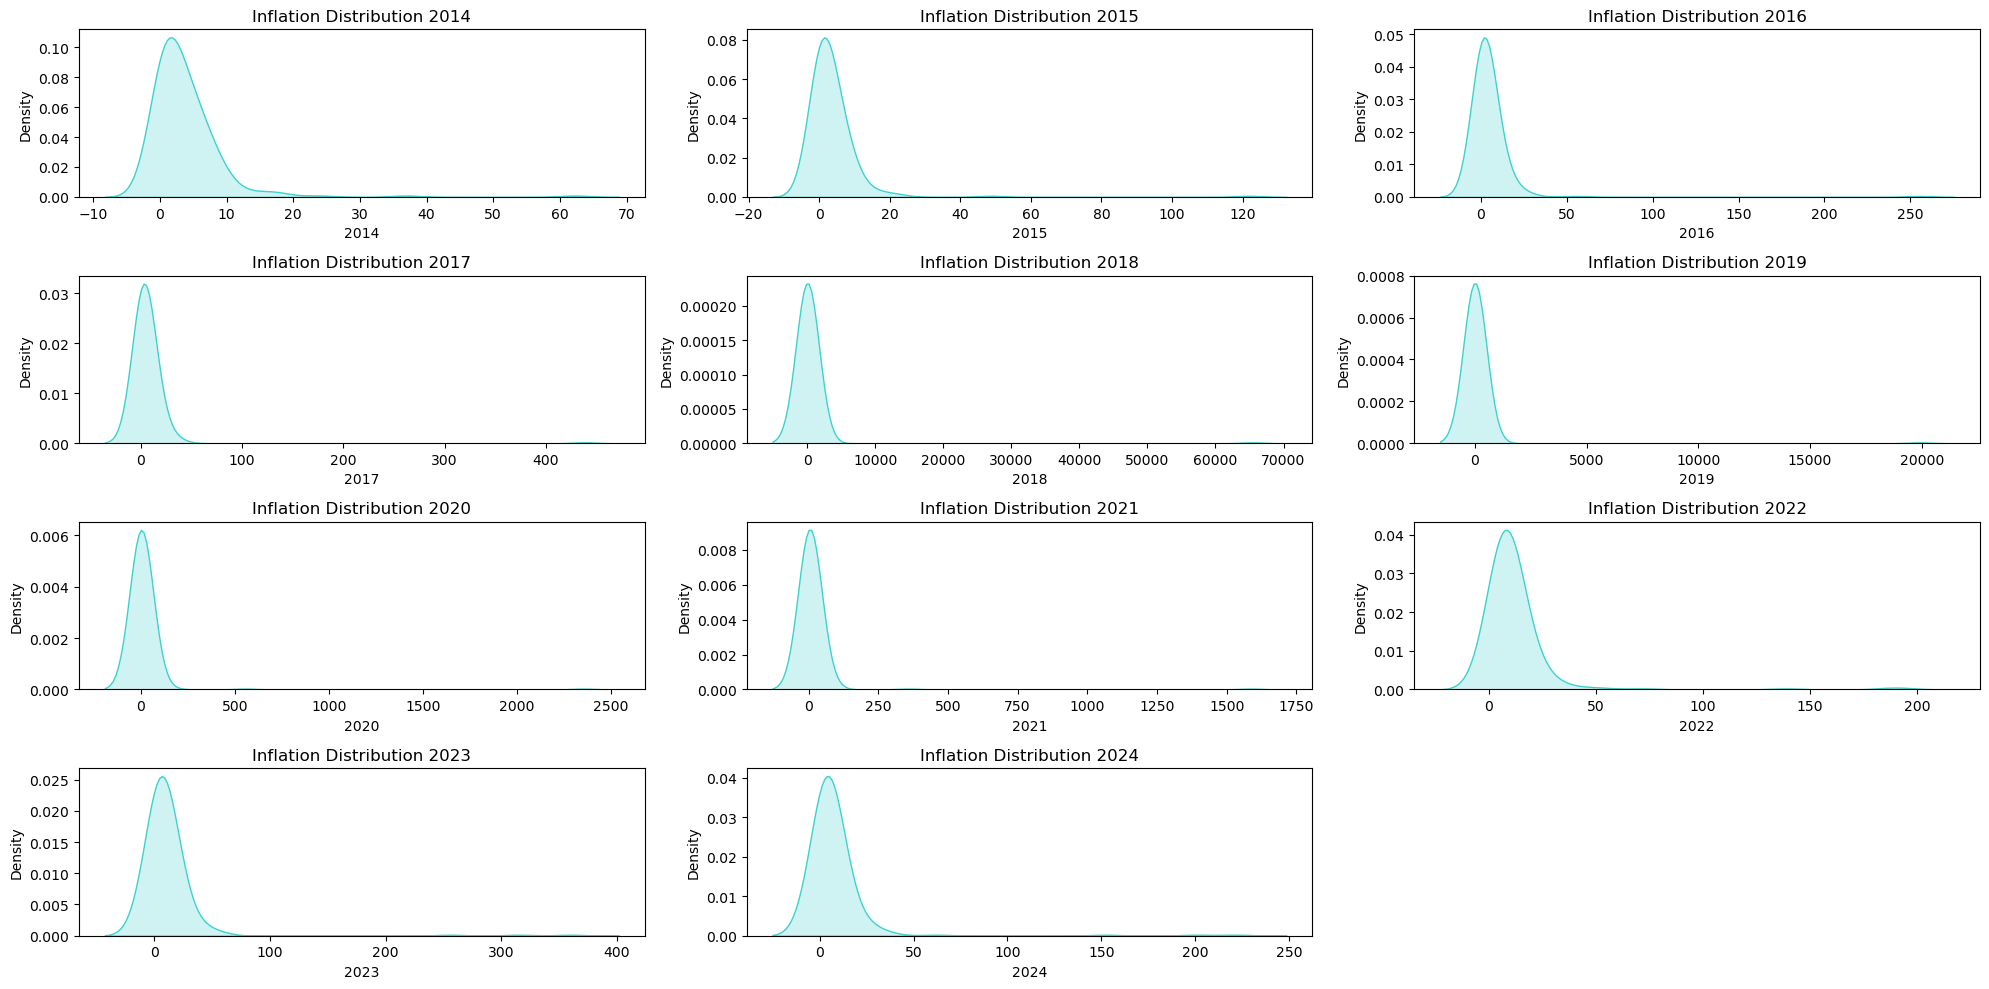

____________________________________________________________________________________________________________________________________________


## **GDP Values Distribution from 2014 to 2024** ##

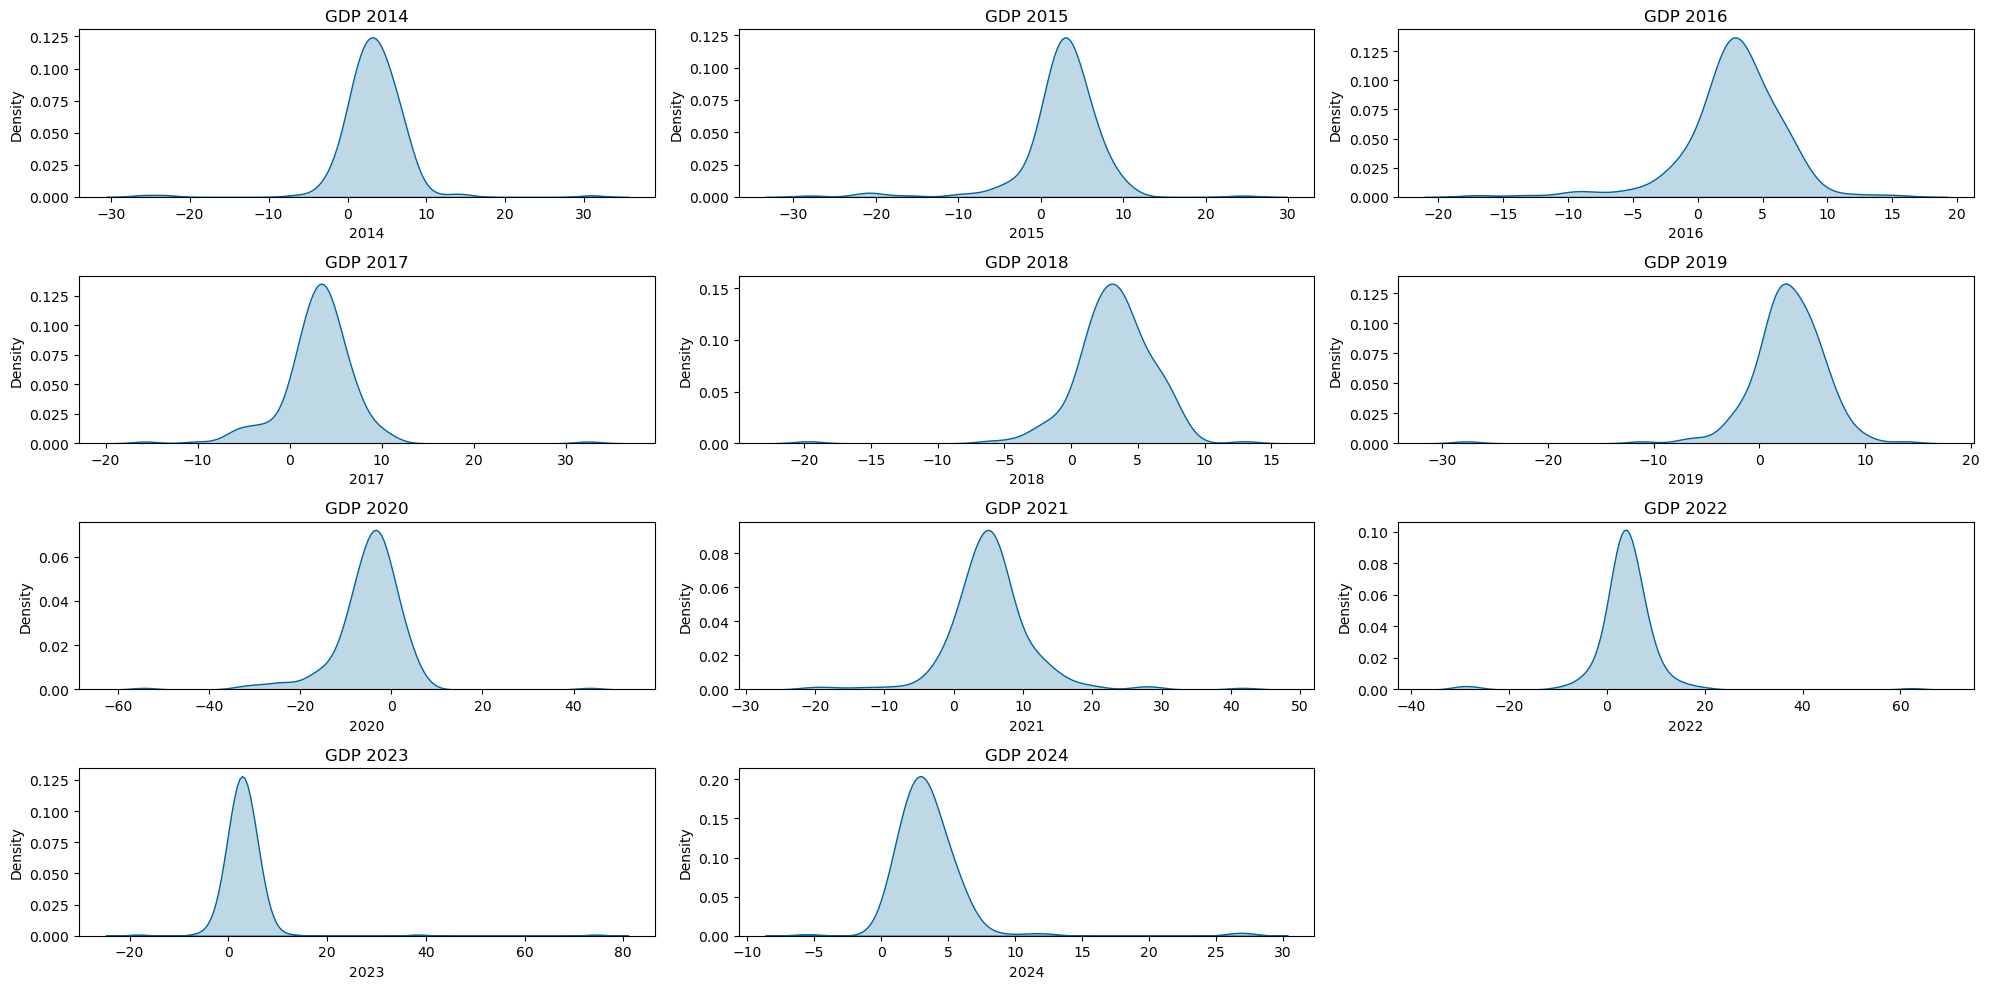

_____________________________________________________________________________________________________________________________________________


## **Unemployment Values Distribution from 2014 to 2024** ##

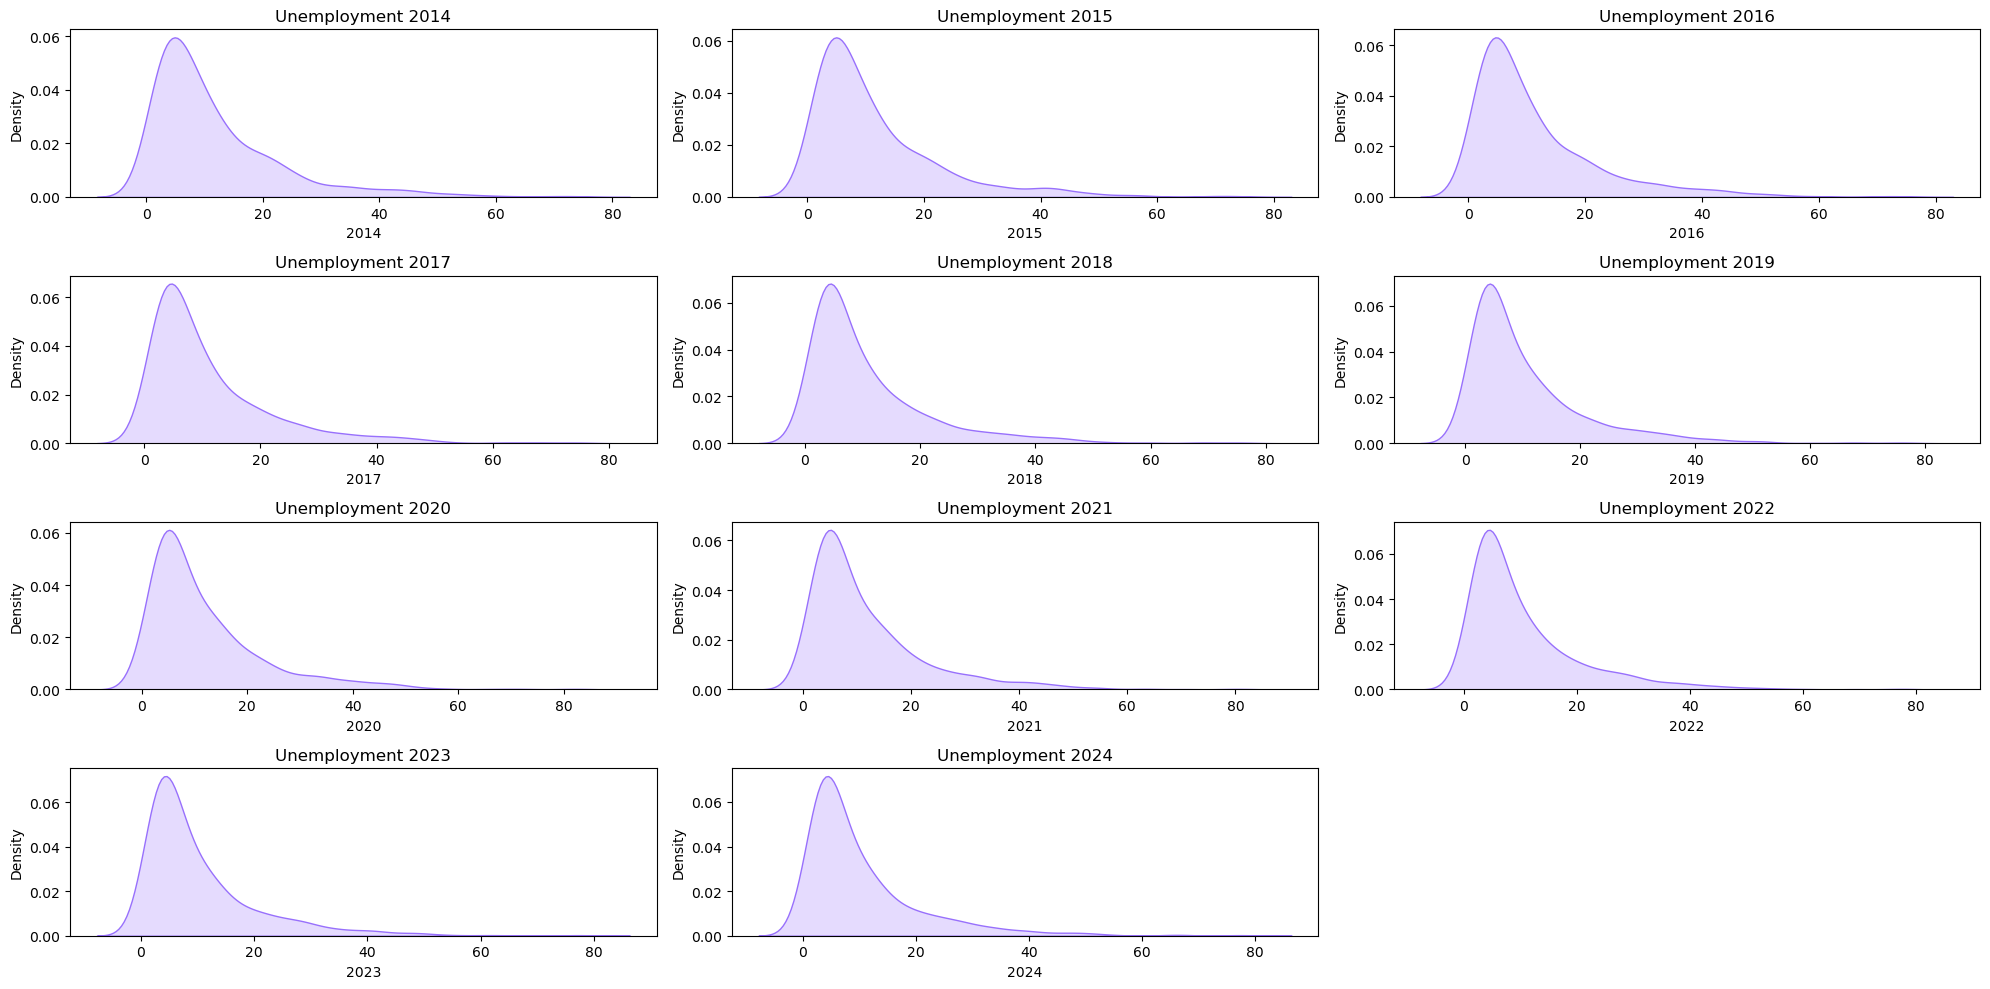

In [56]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Set the figure size for multiple subplots
plt.figure(figsize=(20, 10))

display(Markdown('## **Inflation Values Distribution from 2014 to 2024** ##'))
# Loop through each year column and create a distribution plot
for i, year in enumerate(years):
    plt.subplot(4, 3, i+1)  
    sns.kdeplot(inflation[year].dropna(), fill=True, color = '#3DD2CC') 
    plt.title(f'Inflation Distribution {year}')
    plt.tight_layout() 
plt.show()
print('____________________________________________________________________________________________________________________________________________')

display(Markdown('## **GDP Values Distribution from 2014 to 2024** ##'))
plt.figure(figsize =(20, 10))
for i , year in enumerate(years):
    plt.subplot(4,3,i+1)
    sns.kdeplot(gdp[year].dropna(), fill =True, color = '#00649F')
    plt.title(f'GDP {year}')
    plt.tight_layout()
plt.show()
print('_____________________________________________________________________________________________________________________________________________')

display(Markdown('## **Unemployment Values Distribution from 2014 to 2024** ##'))
plt.figure(figsize =(20, 10))
for i , year in enumerate(years):
    plt.subplot(4,3,i+1)
    sns.kdeplot(unemployment[year].dropna(), fill =True, color = '#9870FC')
    plt.title(f'Unemployment {year}')
    plt.tight_layout()
plt.show()

<div style='background-color:#A2D2DF; padding :15px; font-size: 40px; color :black; text-align:center'>
     <strong> Africa </strong>
</div>

<div style="text-align: center;">
    <img src="attachment:d7cfdaab-fc3e-4e43-8f5d-e2ccf7e6c31e.png" alt="Graph Icon" style="width10px;">
</div>


<div style='background-color:#A2D2DF; padding :5px; font-size: 20px; color :green; text-align:center'>
     <strong> Africa from 2014 to 2024: Inflation, GDP, and Unemployment Rates </strong>
</div>

In [4]:
Africa_inflation = inflation[inflation['Continent']=='Africa'].reset_index(drop = True)
Africa_gdp = gdp[gdp['Continent']=='Africa'].reset_index(drop=True)
Africa_unemployment = unemployment[unemployment['Continent']=='Africa'].reset_index(drop=True)

In [5]:
years = [ '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023','2024']
inf_sum = Africa_inflation[[ '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023','2024']].sum()
gdp_sum =Africa_gdp[[ '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023','2024']].sum()
unemployment_sum =Africa_unemployment[[ '2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023','2024']].sum()

## **Africa Inflation and GDP over time** ##

## **Correlation** ##

Inflation       GDP  Unemployment
Inflation      1.000000 -0.279891      0.573051
GDP           -0.279891  1.000000     -0.465385
Unemployment   0.573051 -0.465385      1.000000

-0.4653854234581896

0.14916218421675412

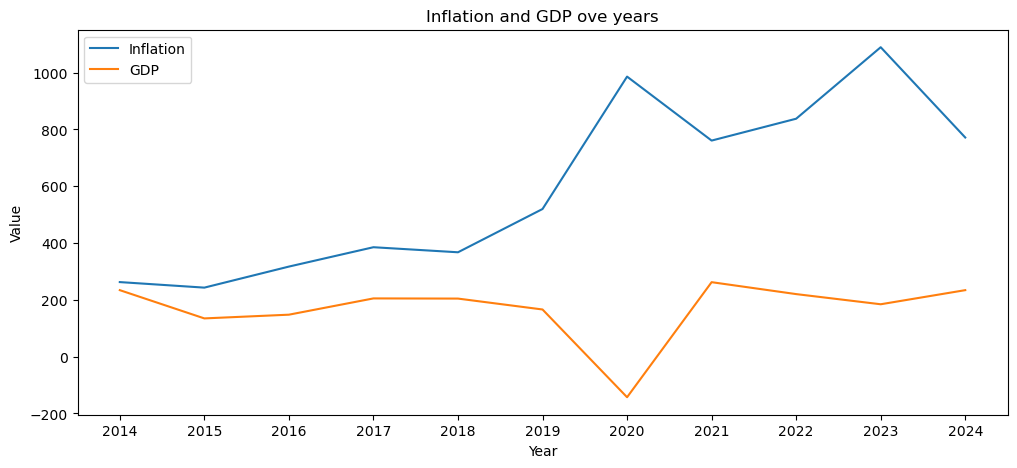

In [16]:
combined_sums = pd.DataFrame({ 
    'Inflation': inf_sum,
    'GDP': gdp_sum,
    'Unemployment': unemployment_sum
})
# Display the combined DataFrame
pearson_coef3, p_value3 = stats.pearsonr(combined_sums['Unemployment'], combined_sums['GDP'])
pearson_coef3, p_value3
plt.figure(figsize =(12,5))
plt.plot(years, inf_sum, label ='Inflation')
plt.plot(years, gdp_sum, label ='GDP')
plt.legend()
plt.title('Inflation and GDP ove years')
plt.xlabel('Year')
plt.ylabel('Value')
r =combined_sums.corr()
display(Markdown('## **Africa Inflation and GDP over time** ##'))
display(Markdown('## **Correlation** ##'))
display(r)
display(pearson_coef3, p_value3 )
plt.show()


<div style='background-color:#FFD7C4; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> Data from Wekepedia (Scraping) </strong>
</div>

In [127]:
url ='https://en.wikipedia.org/wiki/Demographics_of_Africa'

In [150]:
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('table')
# get the table names on the wekebedia:
for i, table in enumerate(tables):
    caption = table.find('Caption')
    table_name = caption.get_text() if caption else f'table { i +1}'
    print(f'Table Name : {table_name}')

Table Name : table 1
Table Name : table 2
Table Name : table 3
Table Name : table 4
Table Name : table 5
Table Name : table 6
Table Name : table 7
Table Name : table 8
Table Name : table 9
Table Name : table 10
Table Name : table 11
Table Name : table 12
Table Name : table 13
Table Name : table 14
Table Name : table 15
Table Name : table 16
Table Name : table 17
Table Name : table 18
Table Name : table 19
Table Name : table 20
Table Name : table 21
Table Name : table 22


<div style='background-color:#705C53; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Africa Population vs world population (include projection) </strong>
</div>

## **Table One from wekepedia Africa vs World (population)** ##

<Figure size 1000x600 with 0 Axes>

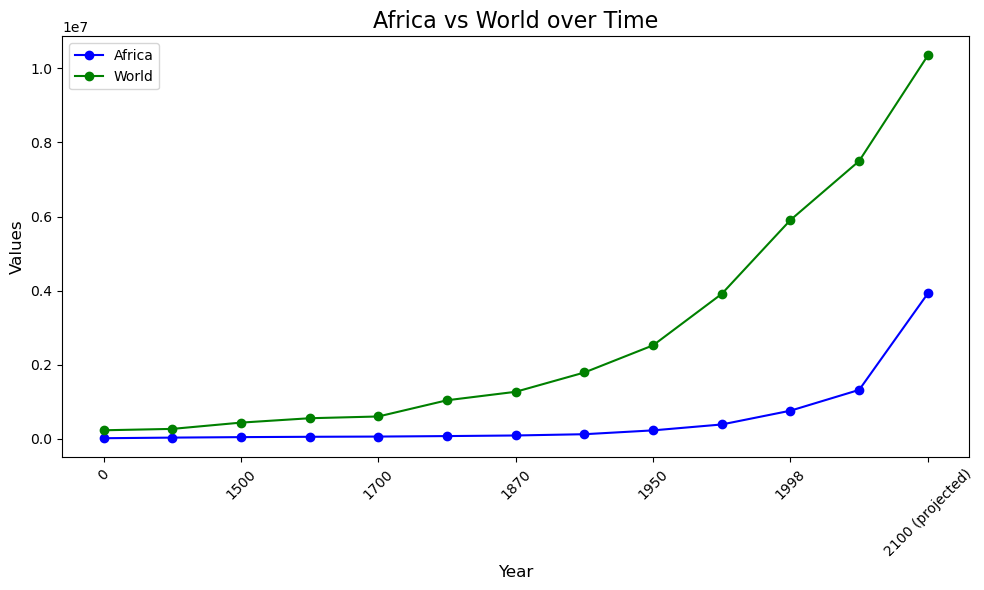

In [353]:
Africa_world = pd.read_html(str(tables[3]), flavor = 'bs4')[0]
Africa_world = Africa_world.T
Africa_world.columns =['Africa', 'World']
Africa_world.drop('Year[7]', inplace =True)
Africa_world =Africa_world.replace([r'\[\d+\]', ',' , ' '],'', regex =True)
Africa_world['Africa'] =Africa_world['Africa'].astype('int') 
Africa_world['World'] =Africa_world['World'].astype('int') 

display(Markdown('## **Table One from wekepedia Africa vs World (population)** ##'))
display(Africa_world.style.background_gradient(cmap='Blues'))

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Africa_world.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color =['blue', 'green'])
plt.title('Africa vs World over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style='background-color:#EDDFE0; padding :5px; font-size: 20px; color :gray; text-align:center'>
     <strong> Wekepedia Africa Population (Birth, Death rates over time) </strong>
</div>

In [352]:
display(Markdown('## **Table tow form Wekepedia Africa Population (Birth, Death rates over time)** ##'))

## **Table tow form Wekepedia Africa Population (Birth, Death rates over time)** ##

In [227]:
Africa_population = pd.read_html(str(tables[5]), flavor = 'bs4')[0]

In [247]:
Africa_population.rename({'Unnamed: 0':'Year'}, axis=1, inplace =True)
Africa_population.style.background_gradient(cmap ='Greens')

In [372]:
display(Markdown('## **Africa Populatio** ##'))

## **Africa Populatio** ##

In [373]:
africa.style.background_gradient(cmap ='Purples')

In [379]:
africa.columns

Index(['Mid-year population (thousands)', 'Live births (thousands)',
       'Deaths (thousands)'],
      dtype='object')

## **Births and Deaths over time Africa** ##

Text(0, 0.5, 'Value')

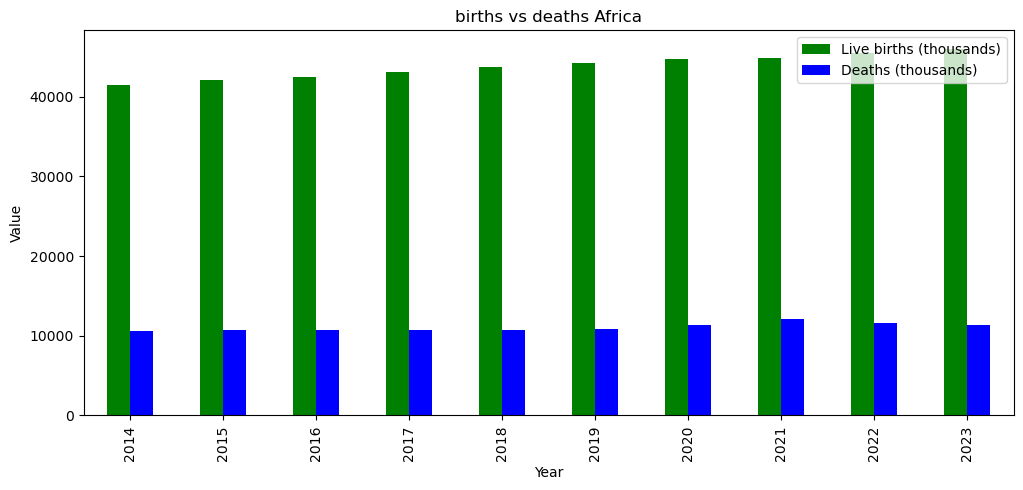

In [389]:

africa[['Live births (thousands)','Deaths (thousands)']].plot(kind='bar', figsize=(12,5), color =['green', 'blue'])
display(Markdown('## **Births and Deaths over time Africa** ##'))
plt.title('births vs deaths Africa')
plt.xlabel('Year')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

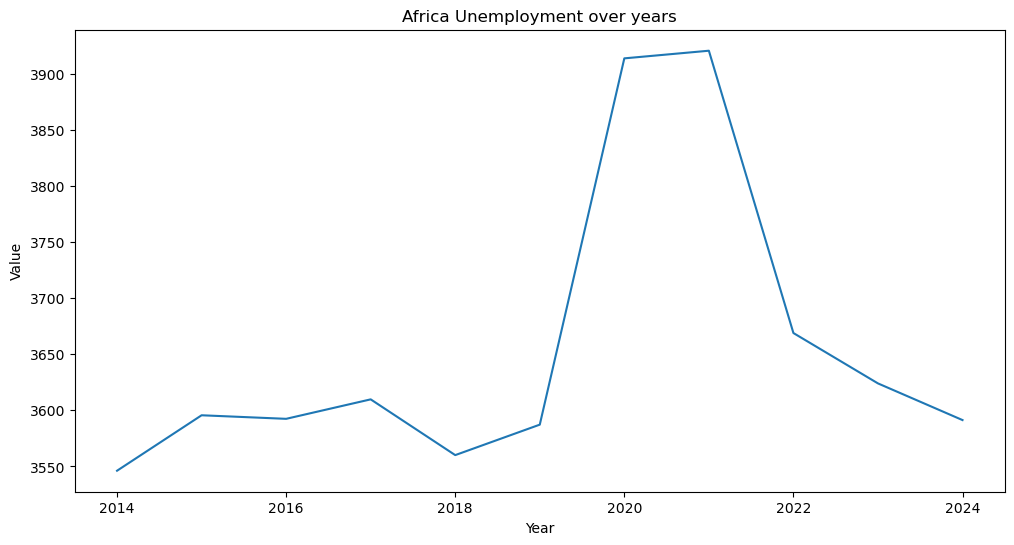

In [15]:
plt.figure(figsize =(12,6))
unemployment_sum.plot()
plt.title('Africa Unemployment over years')
plt.xlabel('Year')
plt.ylabel('Value')

<div style='background-color:#257180; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Africa Birth Rate vs Inflation Rate Over Time </strong>
</div>


Cleaned DataFrame:


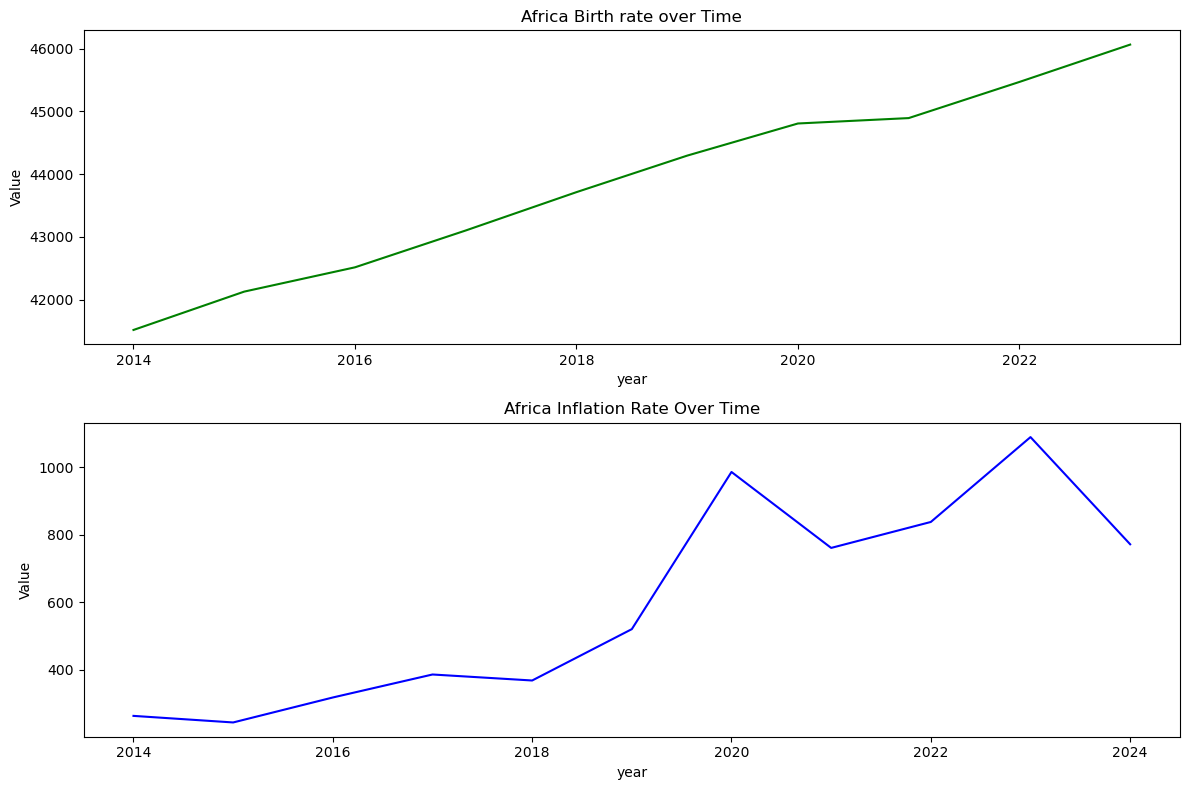

In [368]:
Africa_population['Year'] = pd.to_numeric(Africa_population['Year'], errors='coerce')
africa = Africa_population[Africa_population['Year']>= 2014][['Year','Mid-year population (thousands)', 'Live births (thousands)','Deaths (thousands)']]
africa.style.background_gradient(cmap='BuPu')
africa = africa.T
africa.columns=['2014', '2015','2016', '2017', '2018', '2019', '2020', '2021','2022', '2023']
africa.drop('Year', inplace = True)
for col in africa.columns:
    # Ensure the column is treated as string
    africa[col] = africa[col].astype(str).str.replace(' ', '', regex=True)  # Remove spaces
    africa[col] = pd.to_numeric(africa[col], errors='coerce')  # Convert to numeric

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
africa = africa.T
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.title('Africa Birth rate over Time')
plt.xlabel('year')
plt.ylabel('Value')
africa['Live births (thousands)'].plot(color ='green')
plt.subplot(2,1,2)
plt.title('Africa Inflation Rate Over Time')
plt.xlabel('year')
plt.ylabel('Value')
inf_sum.plot(color ='blue')
plt.tight_layout()

<div style='background-color:red; padding :8px; font-size: px; color :red; text-align:center'>
     <strong> egypt </strong>
</div>

<div style='background-color:white; padding :8px; font-size: 30px; color :#FCDE70; text-align:center'>
     <strong> Egypt </strong>
</div>

<div style='background-color:black; padding :8px; font-size: px; color :black; text-align:center'>
     <strong> Egypt </strong>
</div>

<div style="text-align: center;">
    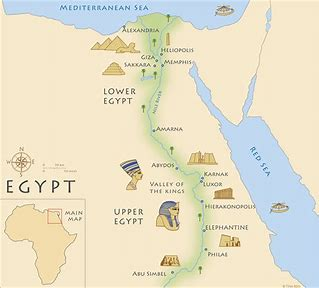
</div>

<Figure size 1200x600 with 0 Axes>

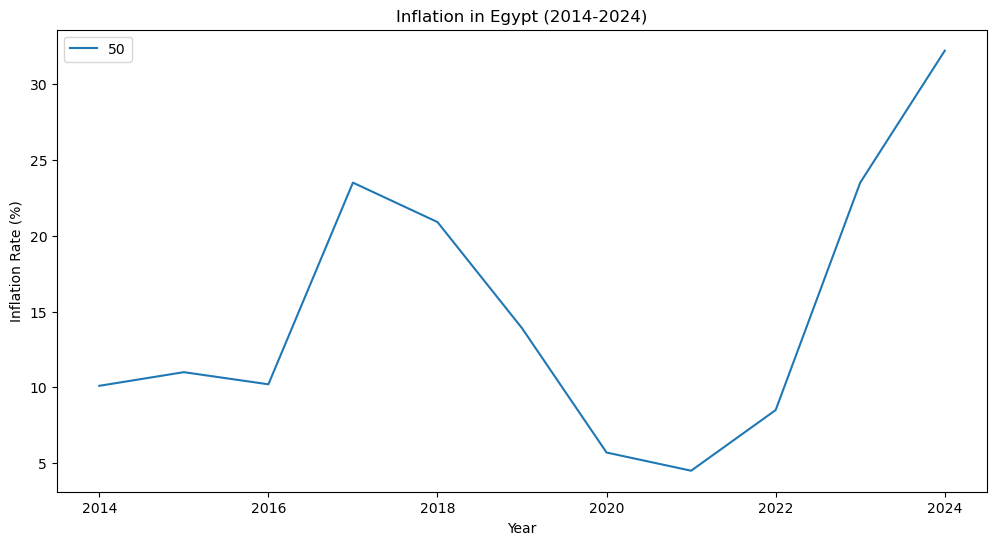

In [30]:
Egypt = inflation[inflation['Country Name']=='Egypt']
Egypt[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].T.plot(kind='line', figsize=(12,6))

# Add labels and title

plt.title('Inflation in Egypt (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')


# Show the plot
plt.show()

<div style='background-color:#F5F5F7; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> Pound History vs Dollr </strong>
</div>

In [4]:
ticker = 'USDEGP=X'
import yfinance as yf
# Download the historical data
data = yf.download(ticker, start='1900-08-08', end='2024-10-14', group_by='ticker')
path1 = r'C:\Users\HP\Documents\final_project\final _project _last_one\pound.csv'
data.to_csv(path1)
print(data.shape)
display(data.tail(40).style.background_gradient(cmap ='Purples'))


[*********************100%***********************]  1 of 1 completed

(5842, 6)


<div style='background-color:#E7CCCC; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> USD/EGP Exchange Rate Over Time </strong>
</div>

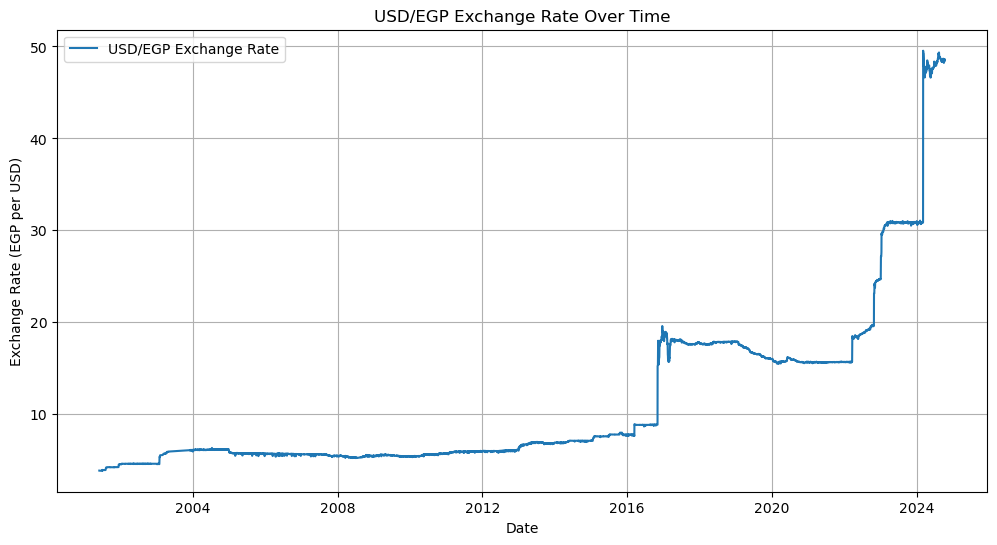

In [30]:

# Plot the 'Close' price (exchange rate) over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='USD/EGP Exchange Rate')
plt.title('USD/EGP Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (EGP per USD)')
plt.legend()
plt.grid(True)
plt.show()

<div style='background-color:#B7E0FF; padding :5px; font-size: 20px; color :black; text-align:center'>
     <strong> Inflation Rate and EGP pound (correlation) </strong>
</div>

## **Correlation** ##

Pearson Correlation between Inflation Rate and USD/EGP Exchange Rate: 0.7173


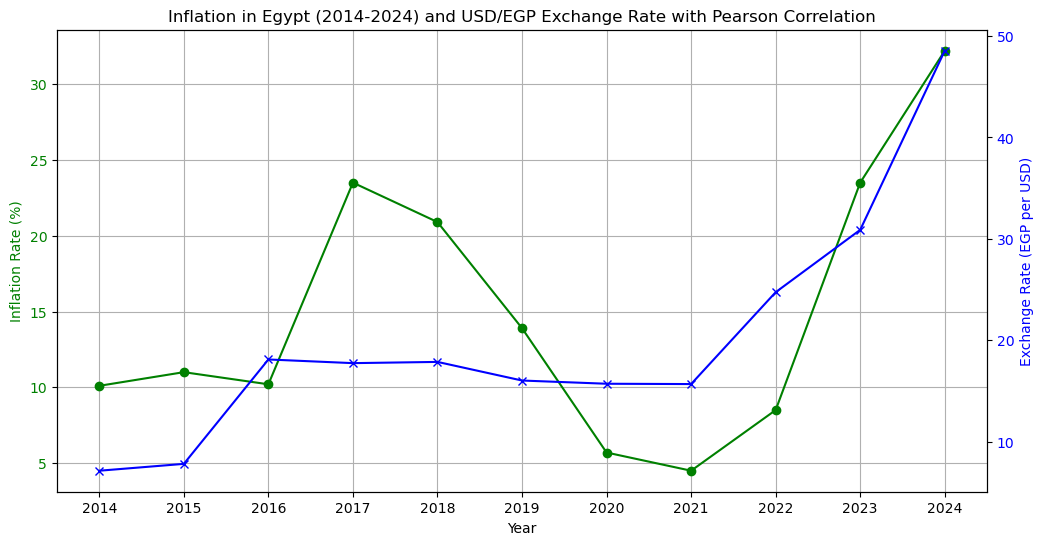

In [35]:
# Filter the exchange rate data to only include 2014-2024
data_filtered = data.loc['2014-01-01':'2024-10-14']

# Assuming the inflation data is already loaded as 'inflation'
Egypt = inflation[inflation['Country Name'] == 'Egypt']
inflation_egypt = Egypt[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].T
inflation_egypt.index = inflation_egypt.index.astype(int)

# Prepare the datasets for correlation
# Ensure both data sets have the same index for years
inflation_egypt.reset_index(inplace=True)
inflation_egypt.columns = ['Year', 'Inflation Rate (%)']
inflation_egypt.set_index('Year', inplace=True)

# Extract the years from the filtered exchange rate data
exchange_rate_data = data_filtered['Close'].resample('Y').last().reset_index()
exchange_rate_data['Year'] = exchange_rate_data['Date'].dt.year
exchange_rate_data.set_index('Year', inplace=True)

# Merge the two datasets on Year
merged_data = inflation_egypt.merge(exchange_rate_data[['Close']], left_index=True, right_index=True)

# Rename columns for clarity
merged_data.columns = ['Inflation Rate (%)', 'Exchange Rate (EGP per USD)']

# Calculate Pearson correlation
correlation = merged_data.corr().iloc[0, 1]  # Get the correlation between Inflation and Exchange Rate

# Print the correlation value
display(Markdown('## **Correlation** ##'))
print(f'Pearson Correlation between Inflation Rate and USD/EGP Exchange Rate: {correlation:.4f}')

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Inflation on the first y-axis
ax1.plot(merged_data.index, merged_data['Inflation Rate (%)'], color='green', label='Inflation Rate (%)', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(merged_data.index)

# Create a second y-axis to plot the USD/EGP exchange rate
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['Exchange Rate (EGP per USD)'], color='blue', label='USD/EGP Exchange Rate', marker='x')
ax2.set_ylabel('Exchange Rate (EGP per USD)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set the title and grid
plt.title('Inflation in Egypt (2014-2024) and USD/EGP Exchange Rate with Pearson Correlation')
ax1.grid(True)

# Show the plot
plt.show()


<div style='background-color:#001F3F; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Egypt Imports and Exports over time </strong>
</div>

Exports Data Columns: Index(['NE.EXP.GNFS.ZS'], dtype='object')
Imports Data Columns: Index(['NE.IMP.GNFS.ZS'], dtype='object')
Exports Data Shape: (64, 3)
Imports Data Shape: (64, 3)


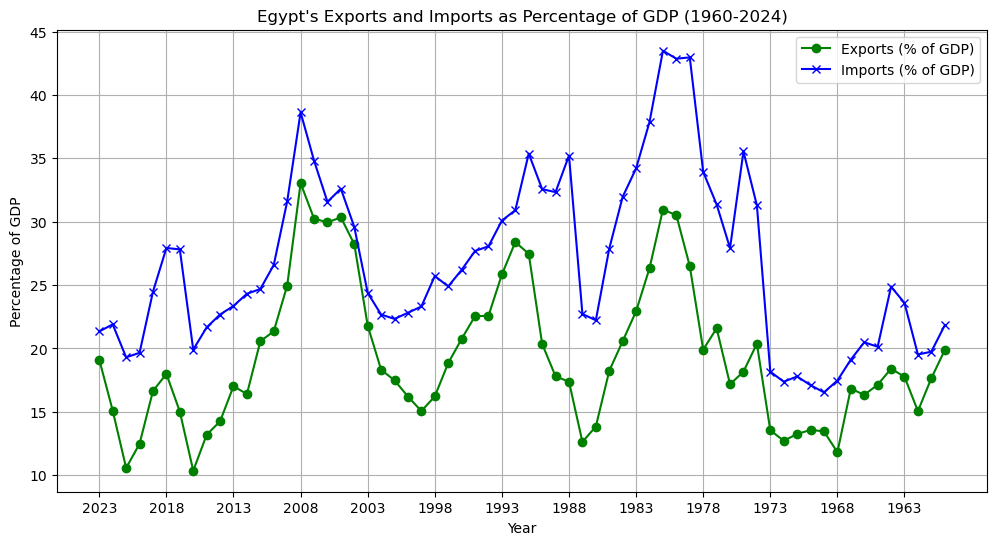

In [37]:

# Fetch Egypt's exports and imports as a percentage of GDP from the World Bank
exports = wb.download(indicator='NE.EXP.GNFS.ZS', country='EGY', start=1960, end=2024)
imports = wb.download(indicator='NE.IMP.GNFS.ZS', country='EGY', start=1960, end=2024)

# Print the columns to see the structure of the DataFrames
print("Exports Data Columns:", exports.columns)
print("Imports Data Columns:", imports.columns)

# Reset index to make 'Year' a column
exports.reset_index(inplace=True)
imports.reset_index(inplace=True)

# Check the number of columns in the DataFrames
print("Exports Data Shape:", exports.shape)
print("Imports Data Shape:", imports.shape)

# Rename columns based on the actual number of columns
# Assuming the structure is 'Country', 'Year', 'Value' for both DataFrames
exports.columns = ['Country', 'Year', 'Exports (% of GDP)']
imports.columns = ['Country', 'Year', 'Imports (% of GDP)']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(exports['Year'], exports['Exports (% of GDP)'], label='Exports (% of GDP)', color='green', marker='o')
plt.plot(imports['Year'], imports['Imports (% of GDP)'], label='Imports (% of GDP)', color='blue', marker='x')

plt.title("Egypt's Exports and Imports as Percentage of GDP (1960-2024)")
plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.xticks(exports['Year'][::5])
plt.legend()
plt.grid(True)

plt.show()



<div style='background-color:#257180; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Imports and Exports vs Inflation over time (Egypt) </strong>
</div>

Correlation between Exports and Inflation Rate: 0.4916
Correlation between Imports and Inflation Rate: -0.1533


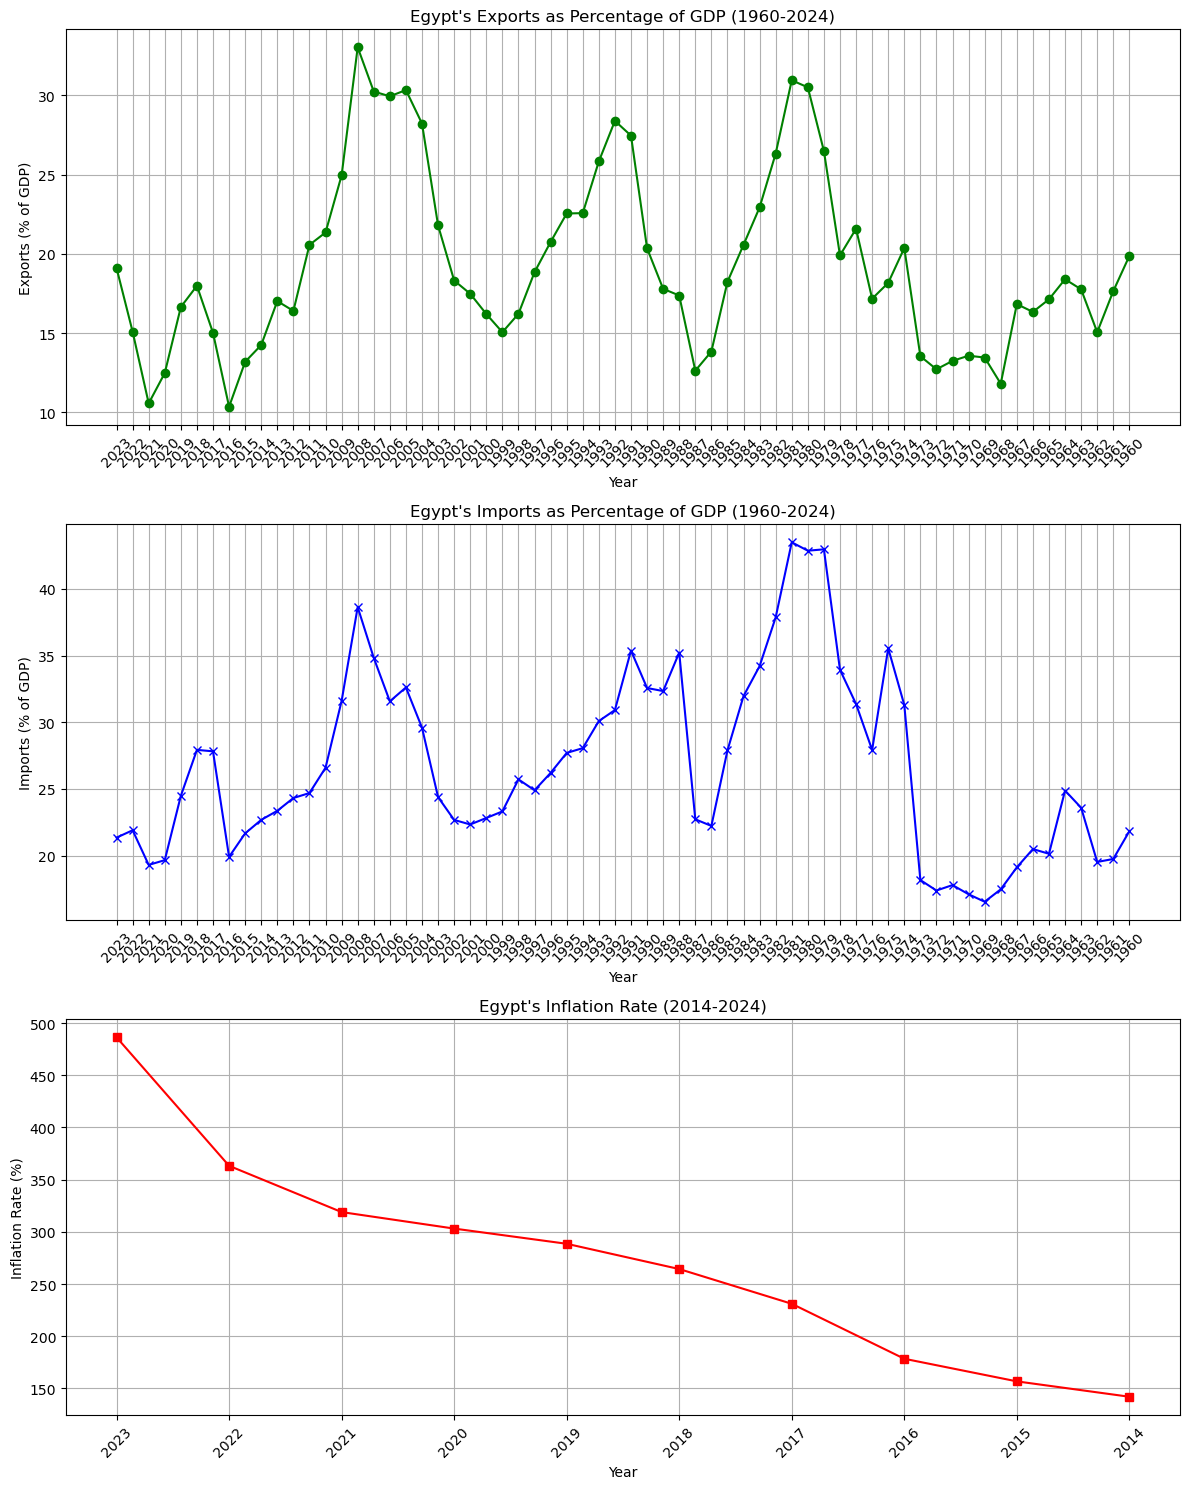

In [38]:

# Fetch Egypt's exports and imports as a percentage of GDP from the World Bank
exports = wb.download(indicator='NE.EXP.GNFS.ZS', country='EGY', start=1960, end=2024)
imports = wb.download(indicator='NE.IMP.GNFS.ZS', country='EGY', start=1960, end=2024)

# Fetch Egypt's inflation data
inflation = wb.download(indicator='FP.CPI.TOTL', country='EGY', start=2014, end=2024)

# Reset index to make 'Year' a column
exports.reset_index(inplace=True)
imports.reset_index(inplace=True)
inflation.reset_index(inplace=True)

# Rename columns
exports.columns = ['Country', 'Year', 'Exports (% of GDP)']
imports.columns = ['Country', 'Year', 'Imports (% of GDP)']
inflation.columns = ['Country', 'Year', 'Inflation Rate (%)']

# Prepare data for plotting
exports = exports[['Year', 'Exports (% of GDP)']]
imports = imports[['Year', 'Imports (% of GDP)']]
inflation = inflation[['Year', 'Inflation Rate (%)']]

# Merge the datasets on 'Year'
merged_data = exports.merge(imports, on='Year').merge(inflation, on='Year')

# Calculate correlations
correlation_exports_inflation = pearsonr(merged_data['Exports (% of GDP)'], merged_data['Inflation Rate (%)'])[0]
correlation_imports_inflation = pearsonr(merged_data['Imports (% of GDP)'], merged_data['Inflation Rate (%)'])[0]

# Print the correlation values without p-values
print(f'Correlation between Exports and Inflation Rate: {correlation_exports_inflation:.4f}')
print(f'Correlation between Imports and Inflation Rate: {correlation_imports_inflation:.4f}')

# Plotting the data in subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Exports plot
axs[0].plot(exports['Year'], exports['Exports (% of GDP)'], label='Exports (% of GDP)', color='green', marker='o')
axs[0].set_title("Egypt's Exports as Percentage of GDP (1960-2024)")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Exports (% of GDP)')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Imports plot
axs[1].plot(imports['Year'], imports['Imports (% of GDP)'], label='Imports (% of GDP)', color='blue', marker='x')
axs[1].set_title("Egypt's Imports as Percentage of GDP (1960-2024)")
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Imports (% of GDP)')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

# Inflation plot
axs[2].plot(inflation['Year'], inflation['Inflation Rate (%)'], label='Inflation Rate (%)', color='red', marker='s')
axs[2].set_title("Egypt's Inflation Rate (2014-2024)")
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Inflation Rate (%)')
axs[2].grid(True)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<div style='background-color:Purple; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Egypt Unemployment over time </strong>
</div>

In [94]:
unemployment_egp = unemployment_[unemployment_['CountryName']=='Egypt']
unemployment_egp.reset_index(drop =True)

unemployment_egp['Year'] = pd.to_datetime(unemployment_egp['Year'], format='%Y')

# Display the updated DataFrame
unemployment_egp.style.background_gradient(cmap ='Purples')

<div style='background-color:Pink; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Egypt Unemployment  time series </strong>
</div>

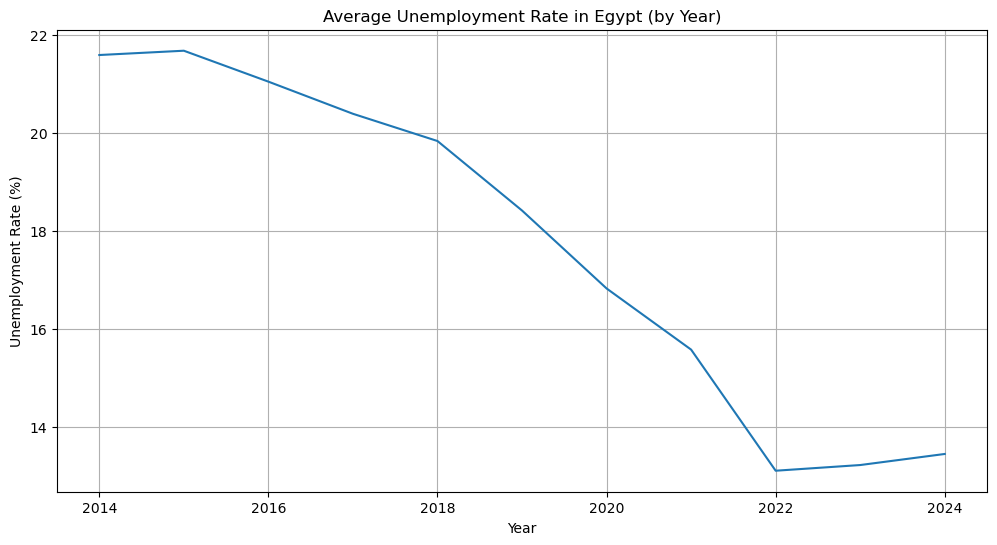

In [44]:
unemployment_egp.groupby('Year')['ValueUnemployment rate by sex and age'].mean().plot(kind='line', figsize=(12, 6))
plt.title('Average Unemployment Rate in Egypt (by Year)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.show()

<div style='background-color:#DA7297; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Unemployment by gender (Egypt) </strong>
</div>

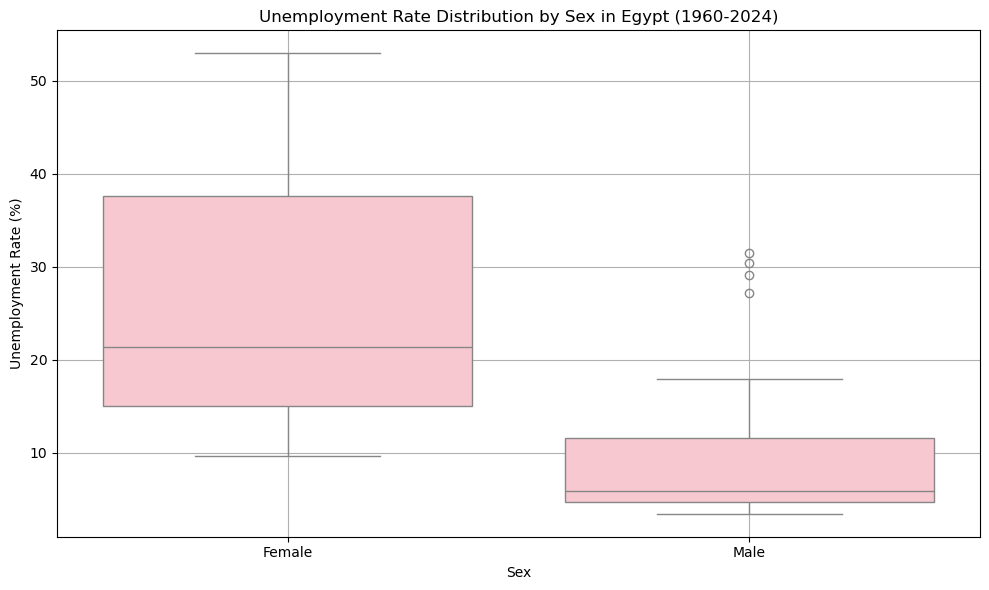

In [95]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Sex', y='ValueUnemployment rate by sex and age', data=unemployment_egp, color ='pink')
plt.title('Unemployment Rate Distribution by Sex in Egypt (1960-2024)')
plt.xlabel('Sex')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.tight_layout()
plt.show()


<div style='background-color:#5BBCFF; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Egyptian unemployment and GDP over time </strong>
</div>

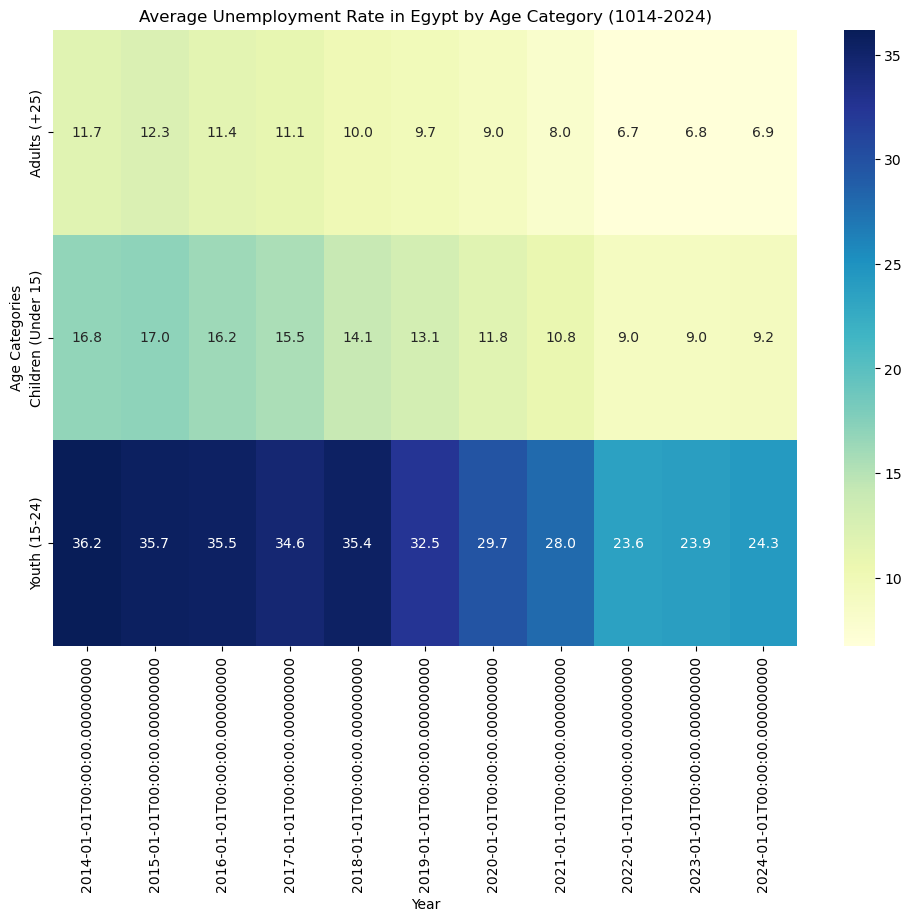

In [88]:
# Pivot the data for the heatmap
heatmap_data = unemployment_egp.pivot_table(values='ValueUnemployment rate by sex and age', 
                                             index='AgeCategories', 
                                             columns='Year', 
                                             aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Unemployment Rate in Egypt by Age Category (1014-2024)')
plt.xlabel('Year')
plt.ylabel('Age Categories')
plt.show()


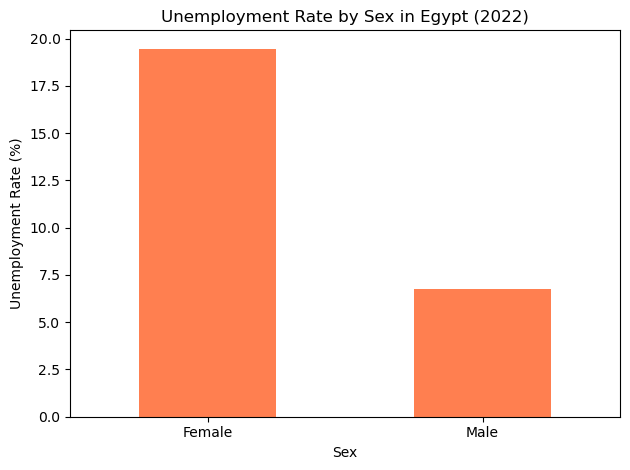

In [76]:
# Example of filtering
year_filter = 2022
filtered_data = unemployment_egp[unemployment_egp['Year'].dt.year == year_filter]

if filtered_data.empty:
    print("No data available for the specified year.")
else:
    # Proceed with plotting
    filtered_data.groupby('Sex')['ValueUnemployment rate by sex and age'].mean().plot(kind='bar', color='coral')
    plt.title(f'Unemployment Rate by Sex in Egypt ({year_filter})')
    plt.xlabel('Sex')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [81]:
gdp_egp = gdp_[gdp_['CountryName']=='Egypt']

<div style='background-color:Purple; padding :5px; font-size: 20px; color :white; text-align:center'>
     <strong> Egyptian GDP over time </strong>
</div>

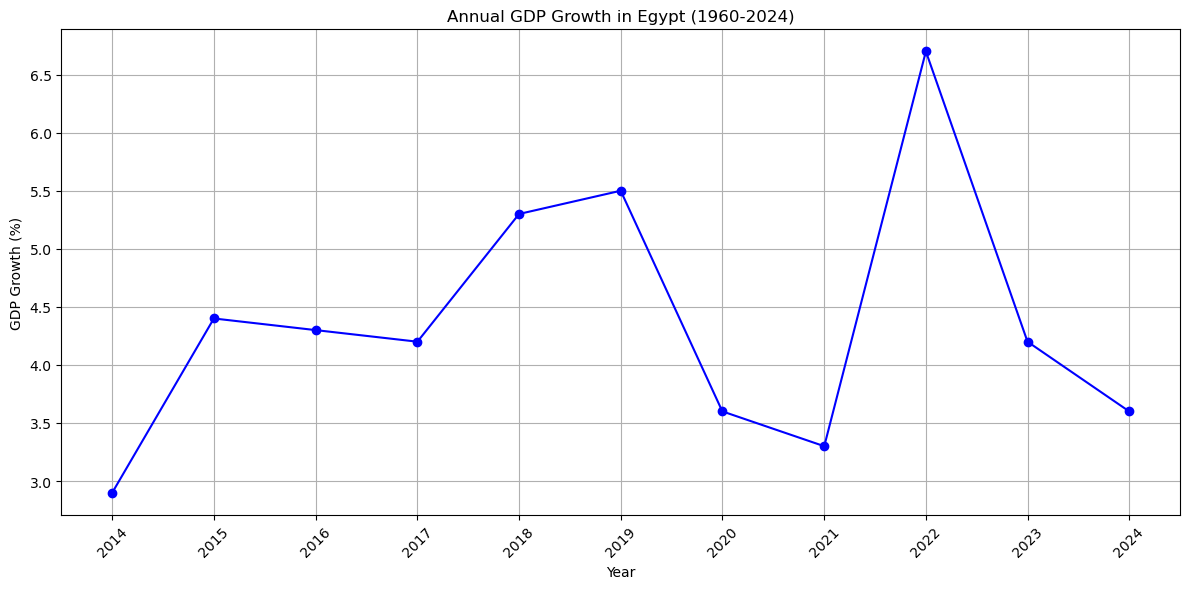

In [83]:
import matplotlib.pyplot as plt

# Convert 'Year' to datetime if it isn't already
gdp_egp['Year'] = pd.to_datetime(gdp_egp['Year'], format='%Y')

# Plotting GDP Growth
plt.figure(figsize=(12, 6))
plt.plot(gdp_egp['Year'], gdp_egp['Annual GDP growth (percent change)'], marker='o', color='blue')
plt.title('Annual GDP Growth in Egypt (1960-2024)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


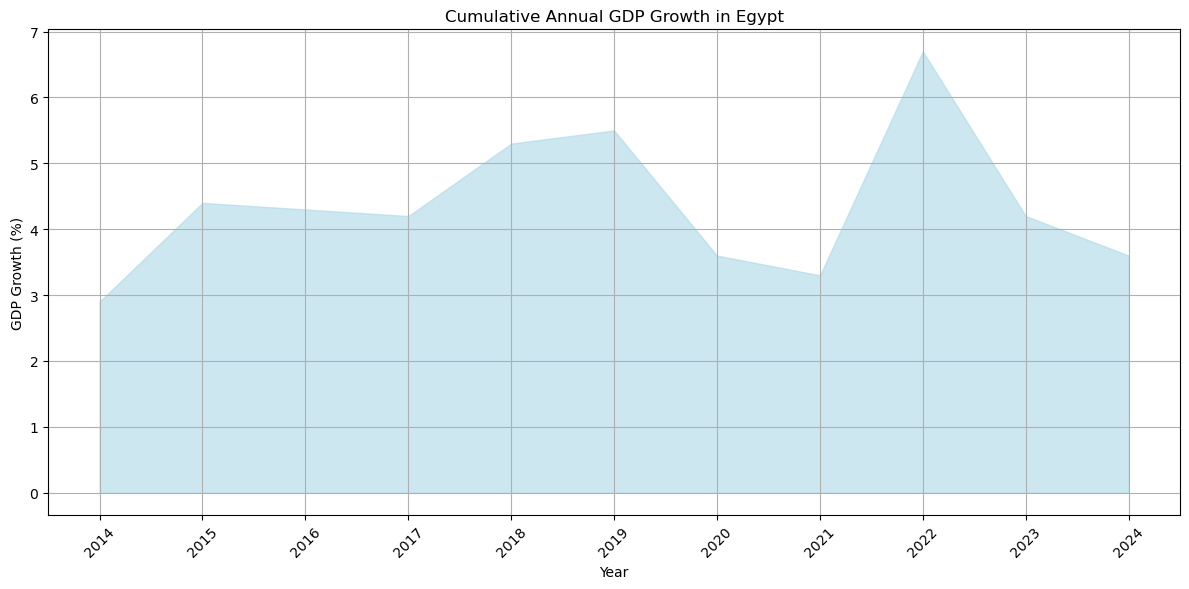

In [87]:
plt.figure(figsize=(12, 6))
plt.fill_between(gdp_egp['Year'], gdp_egp['Annual GDP growth (percent change)'], color='lightblue', alpha=0.6)
plt.title('Cumulative Annual GDP Growth in Egypt')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# 1. Global GDP vs. Inflation
# Example data for plotting (replace with actual data)
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
gdp_growth = [3.5, 3.2, 3.8, 4.0, 3.5, -1.0, 2.5, 4.1, 5.0, 5.2, 4.8]
inflation = [1.5, 2.0, 1.8, 2.5, 3.0, 4.5, 5.5, 3.5, 4.0, 5.0, 5.5]

plt.figure(figsize=(12, 6))
plt.plot(years, gdp_growth, label='GDP Growth (%)', marker='o')
plt.plot(years, inflation, label='Inflation Rate (%)', marker='s')
plt.title('Global GDP Growth vs Inflation (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('global_gdp_inflation.png')  


# 2. Unemployment Rates by Gender
gender = ['Men', 'Women']
unemployment_rates = [6, 8]  # Example rates

plt.figure(figsize=(8, 5))
plt.bar(gender, unemployment_rates, color=['blue', 'pink'])
plt.title('Global Unemployment Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Unemployment Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('unemployment_by_gender.png')  # Save the figure


# 3. Egypt's Inflation and Unemployment
years_egypt = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
inflation_egypt = [10.0, 10.5, 11.0, 12.0, 15.0, 13.5, 14.0, 11.5, 10.0, 9.0, 8.5]
unemployment_egypt = [12, 13, 15, 14, 13, 12, 11, 10, 9, 8, 7]

plt.figure(figsize=(12, 6))
plt.plot(years_egypt, inflation_egypt, label='Inflation Rate (%)', marker='o')
plt.plot(years_egypt, unemployment_egypt, label='Unemployment Rate (%)', marker='s')
plt.title('Egypt Inflation and Unemployment Rates (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('egypt_inflation_unemployment.png')  # Save the figure


# 4. Imports vs. Exports
years_imports = years  # Same years as above
imports = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]  # Example values
exports = [50, 52, 55, 57, 58, 59, 60, 62, 64, 65, 67]  # Example values

plt.figure(figsize=(12, 6))
plt.bar(years_imports, imports, label='Imports', color='lightblue', alpha=0.7)
plt.bar(years_imports, exports, label='Exports', color='lightgreen', alpha=0.7)
plt.title('Egypt Imports vs Exports (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Value ($ Billion)')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('egypt_imports_exports.png')  # Save the figure



<div style='background-color:#789DBC; padding :25px; font-size: 40px; color :white; text-align:center'>
     <strong> Conclusion and Findings </strong>
</div>

<span style="color: #4CAF50;">Data Analysis Project: The Impact of Inflation on GDP and Unemployment Rates</span>

## <span style="color: #2196F3;">1. Global Analysis</span>
In the global analysis, we found a **moderate correlation** between **inflation**, **GDP**, and **unemployment** rates. 

- **Inflation Trends**: Inflation rates are increasing each year, with **Venezuela** recorded as having the highest inflation in history.
- **GDP Growth**: GDP has generally increased year-over-year, but there was a notable decline in **2019**.
- **Unemployment Rates**: The highest unemployment rates are observed among **women** globally. 

While these indicators exhibit interrelationships at the global level, they also reflect country-specific dynamics.

## <span style="color: #2196F3;">2. Analysis of Africa</span>
Africa, accounting for a significant portion of the world's population, shows:

- **High Unemployment**: Unemployment is particularly high among women.
- **GDP Performance**: While GDP growth is decent, **inflation** continues to rise annually.

## <span style="color: #2196F3;">3. Egypt's Economic Indicators</span>
In the case of Egypt, the analysis revealed:

- A **strong relationship** between the **Egyptian pound** and the **inflation rate**.
- Unemployment remains high among **women**.
- Egypt's **imports** consistently exceed **exports** each year.

---

## <span style="color: #FF5722;">4. Conclusion</span>
Overall, while there are significant relationships between these economic indicators, the effects are pronounced at both the global and country-specific levels. Each country may have unique factors that influence these dynamics beyond the global trends.

---

## <span style="color: #FF5722;">5. Visualizations</span>
### Global GDP vs. Inflation
![Global GDP vs Inflation](global_gdp_inflation.png)

### Unemployment Rates by Gender
![Unemployment Rates by Gender](unemployment_by_gender.png)

### Egypt's Inflation and Unemployment
![Egypt Inflation and Unemployment](egypt_inflation_unemployment.png)

### Egypt Imports vs. Exports
![Egypt Imports vs Exports](egypt_imports_exports.png)

---


<div style='background-color:Purple; padding :30px; font-size: 50px; color :white; text-align:center'>
     <strong> the End </strong>
</div>

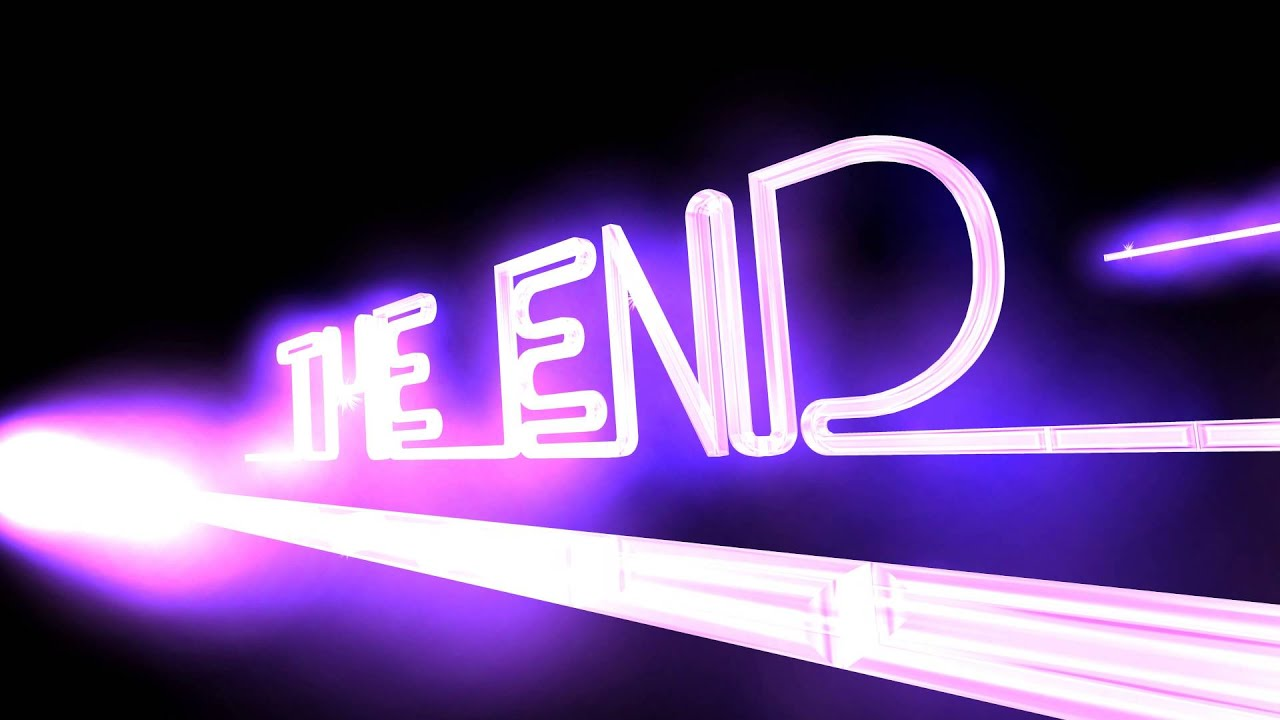